# **Hackathon: Shinkansen Travel Experience**

## **Organization**

This project has 3 notebook files.

1. Data_preparation_TheNormals_Hackathon
2. Model_Building_TheNormals_Hackathon
3. Prediction_TheNormals_Hackathon

This notebook is the second notebook where data stored in .csv file in 1st notebook, is read and various models are built. The best performing models are stored to be used in the next notebook for prediction.

## **Problem Statement**

This problem is to determine passengers' experience, whether they are deligighted or not after their travel on the Shinkansen Bullet Train in Japan. This machine learning exercise aims to determine the relative importance of each parameter about their contribution to the passengers' overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named 'Traveldata_train.csv'.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled 'Surveydata_train.csv'.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled 'Overall_Experience', which is the target variable.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. We are provided with test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## **Solution**

The given problem statement suggests that the problem is a Supervised learning classification problem. We will use various Machine Learning models available in the library for classification and observe which model gives us the best accuracy on the test set and select it as our final model.

### **Loading Libraries**



In [1]:
# install scikeras if not already installed for KerasClassifier wrapper to work
!pip install scikeras

In [2]:
# install optuna
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [3]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.3 MB/s eta 0:00:00


In [4]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to prettu print python datastructures
from pprint import pprint

# library for train test split
from sklearn.model_selection import train_test_split

# library to impute missing values
from sklearn.impute import KNNImputer

# library for scaling data
from sklearn.preprocessing import MinMaxScaler

# library for metrics
from sklearn.metrics import accuracy_score

# libraries for GridSearchCV and RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# library to optuna
import optuna

# libraries for cross validation
from sklearn.model_selection import cross_val_score, KFold

# library for Logistic Regression
from sklearn.linear_model import LogisticRegression

# library fro KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# library for Decision Tree
from sklearn.tree import DecisionTreeClassifier

# library for ensemble models
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# library for XGBoostClassifier model
from xgboost import XGBClassifier

# library for MLPClassifier
from sklearn.neural_network import MLPClassifier

# libraries for Artificial Neural Network
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import ReduceLROnPlateau

# clearing the backend session
from tensorflow.keras import backend

# library to load Sequential model
from tensorflow.keras.models import load_model,save_model

# library for lightgbm
from lightgbm import LGBMClassifier

# library to import for Catboost
import catboost as cb
from catboost import CatBoostClassifier

# library for random number generator
import random

# library to save and load files
import joblib

# ignore Warnings
import warnings
warnings.filterwarnings("ignore")

### **Reading train dataframe from .csv file**



In [5]:
# mount google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read df_train from .csv files
df_train = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/KNN3/train_data.csv')

In [7]:
# read df_test from .csv files
# while we do not use df_test, we need to use the same MinMaxScaler to scale it.
# hence we will scale the df_test and
# store it as df_test_scaled to be used in the next notebook for prediction
df_pred = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/KNN3/pred_data.csv')

### **Data Preprocessing**



In [8]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [9]:
df_pred.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,1.0,NaN,36.0,1.0,1,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,1.0,0.0,21.0,1.0,1,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,0.0,1.0,60.0,1.0,1,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,1.0,1.0,29.0,0.0,0,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,0.0,0.0,18.0,1.0,1,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


We will deal with `df_train` for model building and will use `df_test` later for predicting with our best model.

#### **Seperate Train and Test data**



In [10]:
# saving a copy of df_train for future reference
df_train_copy = df_train.copy()

# splitting X, y
X = df_train.drop(['ID','Overall_Experience'], axis = 1)
y = df_train['Overall_Experience']

In [11]:
X.shape, y.shape

((94379, 23), (94379,))

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66065, 23), (28314, 23), (66065,), (28314,))

#### **Impute Missing values**



In [14]:
# creating a copy of test data
df_pred_orig = df_pred.copy()

In [15]:
# checking for missing values
X_train.isnull().sum()[X_train.isnull().sum() != 0], X_test.isnull().sum()[X_test.isnull().sum() != 0], df_pred.isnull().sum()[df_pred.isnull().sum() != 0]

(Gender                       61
 Customer_Type              6284
 Age                          26
 Type_Travel                6403
 Departure_Delay_in_Mins      41
 Arrival_Delay_in_Mins       256
 Seat_Comfort                 49
 Arrival_Time_Convenient    6275
 Catering                   6153
 Platform_Location            18
 Onboard_Wifi_Service         18
 Onboard_Entertainment        10
 Online_Support               60
 Ease_of_Online_Booking       50
 Onboard_Service            5225
 Legroom                      61
 Baggage_Handling            101
 CheckIn_Service              56
 Cleanliness                   5
 Online_Boarding               5
 dtype: int64,
 Gender                       16
 Customer_Type              2667
 Age                           7
 Type_Travel                2823
 Departure_Delay_in_Mins      16
 Arrival_Delay_in_Mins       101
 Seat_Comfort                 12
 Arrival_Time_Convenient    2655
 Catering                   2588
 Platform_Location          

In [16]:
# making ID column index to be retained in original prediction dataframe
df_pred.set_index('ID', inplace = True)

In [17]:
df_pred.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
99900001,1.0,NaN,36.0,1.0,1,532,0.0,0.0,3.0,1,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
99900002,1.0,0.0,21.0,1.0,1,1425,9.0,28.0,0.0,0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
99900003,0.0,1.0,60.0,1.0,1,2832,0.0,0.0,5.0,0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
99900004,1.0,1.0,29.0,0.0,0,1352,0.0,0.0,3.0,1,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
99900005,0.0,0.0,18.0,1.0,1,1610,17.0,0.0,5.0,0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


In [18]:
# declaring KNNImputer
imputer = KNNImputer(n_neighbors=14)

# imputing missing values
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)
df_pred_imputed = pd.DataFrame(imputer.transform(df_pred), columns = df_pred.columns)

In [19]:
# checking for null values
X_train_imputed.isnull().sum()[X_train_imputed.isnull().sum() != 0], X_test_imputed.isnull().sum()[X_test_imputed.isnull().sum() != 0],  df_pred_imputed.isnull().sum()[df_pred_imputed.isnull().sum() != 0]

(Series([], dtype: int64), Series([], dtype: int64), Series([], dtype: int64))

In [20]:
df_pred_imputed.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,1.0,1.0,36.0,1.0,1.0,532.0,0.0,0.0,3.0,1.0,...,2.0,5.0,4.0,5.0,5.000000,5.0,5.0,4.0,5.0,1.0
1,1.0,0.0,21.0,1.0,1.0,1425.0,9.0,28.0,0.0,0.0,...,3.0,1.0,3.0,3.0,5.000000,3.0,4.0,3.0,5.0,3.0
2,0.0,1.0,60.0,1.0,1.0,2832.0,0.0,0.0,5.0,0.0,...,5.0,5.0,5.0,2.0,2.000000,2.0,2.0,4.0,2.0,5.0
3,1.0,1.0,29.0,0.0,0.0,1352.0,0.0,0.0,3.0,1.0,...,1.0,3.0,5.0,1.0,3.000000,2.0,5.0,5.0,5.0,1.0
4,0.0,0.0,18.0,1.0,1.0,1610.0,17.0,0.0,5.0,0.0,...,5.0,5.0,5.0,5.0,3.714286,3.0,5.0,5.0,5.0,5.0


#### **Binning**



Creating Age Bins

In [21]:
# bin df_train['Age'] into 4 bins
X_train_imputed['Age_Bins'] = pd.cut(X_train_imputed['Age'], bins = [0, 20, 40, 60, float('inf')], labels = ['0-20', '21-40', '41-60', '61+'])
X_train_imputed['Age_Bins'].replace(['0-20', '21-40', '41-60', '61+'], [0, 1, 2, 3], inplace = True)

X_test_imputed['Age_Bins'] = pd.cut(X_test_imputed['Age'], bins = [0, 20, 40, 60, float('inf')], labels = ['0-20', '21-40', '41-60', '61+'])
X_test_imputed['Age_Bins'].replace(['0-20', '21-40', '41-60', '61+'], [0, 1, 2, 3], inplace = True)

df_pred_imputed['Age_Bins'] = pd.cut(df_pred_imputed['Age'], bins = [0, 20, 40, 60, float('inf')], labels = ['0-20', '21-40', '41-60', '61+'])
df_pred_imputed['Age_Bins'].replace(['0-20', '21-40', '41-60', '61+'], [0, 1, 2, 3], inplace = True)

In [22]:
X_train_imputed['Age_Bins'].value_counts(), X_test_imputed['Age_Bins'].value_counts(), df_pred_imputed['Age_Bins'].value_counts()

(1    27130
 2    26703
 0     7171
 3     5061
 Name: Age_Bins, dtype: int64,
 1    11576
 2    11552
 0     2999
 3     2187
 Name: Age_Bins, dtype: int64,
 1    14555
 2    14327
 0     3901
 3     2819
 Name: Age_Bins, dtype: int64)

Creating Arrival_Delay_in_Mins Bins

In [23]:
# bin 'Arrival_Delay_in_Mins' into 4 bins
X_train_imputed['Arrival_Delay_Bins'] = pd.cut(X_train_imputed['Arrival_Delay_in_Mins'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
X_train_imputed['Arrival_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

X_test_imputed['Arrival_Delay_Bins'] = pd.cut(X_test_imputed['Arrival_Delay_in_Mins'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
X_test_imputed['Arrival_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

df_pred_imputed['Arrival_Delay_Bins'] = pd.cut(df_pred_imputed['Arrival_Delay_in_Mins'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
df_pred_imputed['Arrival_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

In [24]:
X_train_imputed['Arrival_Delay_Bins'].value_counts(), X_test_imputed['Arrival_Delay_Bins'].value_counts(), df_pred_imputed['Arrival_Delay_Bins'].value_counts()

(0    37106
 2    16570
 1    10733
 3     1656
 Name: Arrival_Delay_Bins, dtype: int64,
 0    15815
 2     7221
 1     4611
 3      667
 Name: Arrival_Delay_Bins, dtype: int64,
 0    19850
 2     9097
 1     5750
 3      905
 Name: Arrival_Delay_Bins, dtype: int64)

Creating Distance_Traveled Bins

In [25]:
# create 3 bins for Travel_Distance
X_train_imputed['Travel_Distance_Bins'] = pd.cut(X_train_imputed['Travel_Distance'], bins = [0, 1000, 3000, float('inf')], labels = ['0-1000', '1001-3000', '3001+'])
X_train_imputed['Travel_Distance_Bins'].replace(['0-1000', '1001-3000', '3001+'], [0, 1, 2], inplace = True)

X_test_imputed['Travel_Distance_Bins'] = pd.cut(X_test_imputed['Travel_Distance'], bins = [0, 1000, 3000, float('inf')], labels = ['0-1000', '1001-3000', '3001+'])
X_test_imputed['Travel_Distance_Bins'].replace(['0-1000', '1001-3000', '3001+'], [0, 1, 2], inplace = True)

df_pred_imputed['Travel_Distance_Bins'] = pd.cut(df_pred_imputed['Travel_Distance'], bins = [0, 1000, 3000, float('inf')], labels = ['0-1000', '1001-3000', '3001+'])
df_pred_imputed['Travel_Distance_Bins'].replace(['0-1000', '1001-3000', '3001+'], [0, 1, 2], inplace = True)

In [26]:
X_train_imputed['Travel_Distance_Bins'].value_counts(), X_test_imputed['Travel_Distance_Bins'].value_counts(), df_pred_imputed['Travel_Distance_Bins'].value_counts()

(1    44603
 0    11436
 2    10026
 Name: Travel_Distance_Bins, dtype: int64,
 1    18989
 0     5032
 2     4293
 Name: Travel_Distance_Bins, dtype: int64,
 1    23994
 0     6120
 2     5488
 Name: Travel_Distance_Bins, dtype: int64)

In [27]:
df_pred_imputed.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Age_Bins,Arrival_Delay_Bins,Travel_Distance_Bins
0,1.0,1.0,36.0,1.0,1.0,532.0,0.0,0.0,3.0,1.0,...,5.0,5.000000,5.0,5.0,4.0,5.0,1.0,1,0,0
1,1.0,0.0,21.0,1.0,1.0,1425.0,9.0,28.0,0.0,0.0,...,3.0,5.000000,3.0,4.0,3.0,5.0,3.0,1,2,1
2,0.0,1.0,60.0,1.0,1.0,2832.0,0.0,0.0,5.0,0.0,...,2.0,2.000000,2.0,2.0,4.0,2.0,5.0,2,0,1
3,1.0,1.0,29.0,0.0,0.0,1352.0,0.0,0.0,3.0,1.0,...,1.0,3.000000,2.0,5.0,5.0,5.0,1.0,1,0,1
4,0.0,0.0,18.0,1.0,1.0,1610.0,17.0,0.0,5.0,0.0,...,5.0,3.714286,3.0,5.0,5.0,5.0,5.0,0,0,1


#### **Scaling**



In [28]:
# scale the dataframe using MinMaxScaler
scaler = MinMaxScaler()

# scaled X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns = X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns = X_test_imputed.columns)
df_pred_scaled = pd.DataFrame(scaler.transform(df_pred_imputed), columns = df_pred_imputed.columns)

In [29]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((66065, 26), (28314, 26), (66065,), (28314,))

In [30]:
df_pred_scaled = pd.concat([df_pred_orig['ID'], df_pred_scaled], axis = 1)

In [31]:
df_pred_scaled.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Age_Bins,Arrival_Delay_Bins,Travel_Distance_Bins
0,99900001,1.0,1.0,0.371795,1.0,1.0,0.069845,0.000000,0.000000,0.6,...,1.0,1.000000,1.0,1.00,0.8,1.0,0.2,0.333333,0.000000,0.0
1,99900002,1.0,0.0,0.179487,1.0,1.0,0.199246,0.005653,0.017677,0.0,...,0.6,1.000000,0.6,0.75,0.6,1.0,0.6,0.333333,0.666667,0.5
2,99900003,0.0,1.0,0.679487,1.0,1.0,0.403130,0.000000,0.000000,1.0,...,0.4,0.400000,0.4,0.25,0.8,0.4,1.0,0.666667,0.000000,0.5
3,99900004,1.0,1.0,0.282051,0.0,0.0,0.188668,0.000000,0.000000,0.6,...,0.2,0.600000,0.4,1.00,1.0,1.0,0.2,0.333333,0.000000,0.5
4,99900005,0.0,0.0,0.141026,1.0,1.0,0.226054,0.010678,0.000000,1.0,...,1.0,0.742857,0.6,1.00,1.0,1.0,1.0,0.000000,0.000000,0.5


##### **Final Data Preparation ready for building model**

In [32]:
df_pred_scaled.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Age_Bins,Arrival_Delay_Bins,Travel_Distance_Bins
0,99900001,1.0,1.0,0.371795,1.0,1.0,0.069845,0.000000,0.000000,0.6,...,1.0,1.000000,1.0,1.00,0.8,1.0,0.2,0.333333,0.000000,0.0
1,99900002,1.0,0.0,0.179487,1.0,1.0,0.199246,0.005653,0.017677,0.0,...,0.6,1.000000,0.6,0.75,0.6,1.0,0.6,0.333333,0.666667,0.5
2,99900003,0.0,1.0,0.679487,1.0,1.0,0.403130,0.000000,0.000000,1.0,...,0.4,0.400000,0.4,0.25,0.8,0.4,1.0,0.666667,0.000000,0.5
3,99900004,1.0,1.0,0.282051,0.0,0.0,0.188668,0.000000,0.000000,0.6,...,0.2,0.600000,0.4,1.00,1.0,1.0,0.2,0.333333,0.000000,0.5
4,99900005,0.0,0.0,0.141026,1.0,1.0,0.226054,0.010678,0.000000,1.0,...,1.0,0.742857,0.6,1.00,1.0,1.0,1.0,0.000000,0.000000,0.5


In [33]:
X_train_scaled.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Age_Bins', 'Arrival_Delay_Bins',
       'Travel_Distance_Bins'],
      dtype='object')

In [34]:
# index ID a column in df_pred
X_train_scaled.drop(['Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins', 'Age', 'Travel_Distance'], axis = 1, inplace = True)
X_test_scaled.drop(['Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins', 'Age', 'Travel_Distance'], axis = 1, inplace = True)
df_pred_scaled.drop(['Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins', 'Age', 'Travel_Distance'], axis = 1, inplace = True)
X_train_scaled.columns

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Age_Bins', 'Arrival_Delay_Bins',
       'Travel_Distance_Bins'],
      dtype='object')

### **Building Models**



#### **Functions to build models and obtain scores**

In [35]:
# try model on scaled data
def try_model_scaled(model, model_name = None, model_description = None, save_model = False):
    # the below section uses CV for all models
    # CV ensures that the model is trained on part of the train set
    # and tested on holdout (validation set) of the train set.
    # multiple iterations gives us a good idea how the model with perform on unseen data

    # cross validated accuracy score
    cv_train_accuracy, cv_train_std = cross_validate_scaled(model)
    print("Cross validated Train Accuracy is: {0:.4f}".format(cv_train_accuracy))
    print("Cross validated Train Std dev is: {0:.4f}".format(cv_train_std))
    print("-"*100)

    # since a clone of the model is used in every iteration of CV, the model remains untrained
    # we need to retrain model with the entire train dataset before prediction
    model.fit(X_train_scaled, y_train)

    if save_model:
      # save model for future predictions
      filepath = '/content/drive/MyDrive/DScourse/Hackathon/KNN3/' + model_name + '.joblib'
      joblib.dump(model, filepath)

    # predict model on test set
    y_pred_train = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print("Train Accuracy is: {0:.4f}".format(train_accuracy))

    # predict model on test set
    y_pred_test = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy is: {0:.4f}".format(test_accuracy))

    return {'Model_name': model_name,
            'Model_description': model_description,
            'CV_accuracy': cv_train_accuracy,
            'CV_std(+/-)': cv_train_std,
            'Train_accuracy': train_accuracy,
            'Test_accuracy': test_accuracy}

In [36]:
# function to perform cross validation on scaled X
def cross_validate_scaled(model):
    cv = KFold(n_splits=10)
    cv_score_train = cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'accuracy', verbose=1, n_jobs = -1)
    print("-"*100)
    print("Cross validation scores:", cv_score_train)
    print("-"*100)
    return np.mean(cv_score_train), cv_score_train.std()

In [37]:
# function to perform GridSearchCV
def gridsearch(model, params, scaled = True):
    cv = KFold(n_splits=3)
    model_gridsearch = GridSearchCV(model, params, cv = cv, scoring = 'accuracy', verbose = 2, n_jobs=-1)

    if scaled:
        gridmodel = model_gridsearch.fit(X_train_scaled, y_train)
    else:
        gridmodel = model_gridsearch.fit(X_train, y_train)

    print("Best Parameters for GridSearchCV:")
    pprint(gridmodel.best_params_)

    return gridmodel.best_params_

In [38]:
# function to perform RandomizedSearchCV
def randomsearch(model, params, n_iter = 25, scaled = True):
    cv = KFold(n_splits=3)
    model_randomsearch = RandomizedSearchCV(model, params, cv = cv, n_iter = n_iter, scoring = 'accuracy', verbose = 2, n_jobs=-1)

    if scaled:
        randommodel = model_randomsearch.fit(X_train_scaled, y_train)
    else:
        randommodel = model_randomsearch.fit(X_train, y_train)

    print("Best Parameters for RandomizedSearchCV:")
    pprint(randommodel.best_params_)

    return randommodel.best_params_

In [39]:
# predict on the test data
def predict(model, model_name):
    # create a copy of df_test
    predictiondata = df_pred_scaled.copy()

    # set 'ID' column as the index
    predictiondata.set_index('ID', inplace=True)

    # separate ID column from df_test for predictions
    X = predictiondata.copy()

    # predict on test set
    y_pred = np.round(model.predict(X), 0).astype(int) if model == 'nn_model9a' else model.predict(X).astype(int)

    # create a DataFrame for the current model's predictions
    prediction_df = pd.DataFrame({'ID': X.index, 'Overall_Experience': y_pred.flatten()})

    # save predictions to a CSV file for the current model
    filename = "/content/drive/MyDrive/DScourse/Hackathon/KNN3/Predictions/" + model_name + "_pred.csv"
    prediction_df.to_csv(filename, index=False, header=True, line_terminator='\r\n')

In [40]:
# initiate empty DataFrame to store accuracy scores
comp_acc_scores = pd.DataFrame(columns = ['Model_name', 'Model_description', 'CV_accuracy', 'CV_std(+/-)', 'Train_accuracy', 'Test_accuracy'])

# initiate empty DataFrame to store accuracy scores for test predictions only
test_acc_scores = pd.DataFrame(columns = ['Model_name', 'Model_description', 'Test_accuracy'])

#### **Model 1: Logistic Regression**

##### **Model 1a: Logistic Regression Base Model**

###### Tuning the model

In [ ]:
# declare model for logistic regression
lr_model1a = LogisticRegression(n_jobs = -1, random_state = 13)

# obtain model performance for scaled data
acc_score = try_model_scaled(lr_model1a, 'lr_model1a', 'Logistic Regression')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.84062358 0.82669896 0.83063418 0.83426669 0.83865597 0.83318196
 0.82833787 0.83620951 0.83651226 0.83348471]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.8339
Cross validated Train Std dev is: 0.0042
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.8340
Test Accuracy is: 0.8342


In [ ]:
# declare model for logistic regression
lr_model1a = LogisticRegression(penalty = 'l2', solver = 'liblinear', n_jobs = -1, random_state = 13)

# obtain model performance for scaled data
acc_score = try_model_scaled(lr_model1a, 'lr_model1a', 'Logistic Regression', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.84077494 0.82624489 0.83048282 0.83426669 0.83850462 0.83333333
 0.82894338 0.83681502 0.83696639 0.83363609]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.8340
Cross validated Train Std dev is: 0.0043
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.8341
Test Accuracy is: 0.8343


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,lr_model1a,Logistic Regression,0.833997,0.004262,0.834133,0.834322


###### Top features

In [ ]:
# Printing the coefficients of logistic regression
cols = X_train_scaled.columns
coef_lg = lr_model1a.coef_
coeff_df = pd.DataFrame()
coeff_df['coef_'] = pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

# since interpreting the impact of coefficients is hard we obtain the odds which is more interpretable
coeff_df['odds'] = np.exp(coeff_df['coef_'])

# display the coefficient and odds dataframe
coeff_df

,coef_,odds
Onboard_Entertainment,3.396982,29.873803
Customer_Type,1.817404,6.155857
Onboard_Service,1.442267,4.230276
CheckIn_Service,1.345176,3.838862
Ease_of_Online_Booking,1.318682,3.738492
Seat_Comfort,1.292959,3.643551
Legroom,1.049381,2.855881
Gender,0.948342,2.581426
Travel_Class,0.841433,2.319688
Online_Boarding,0.764309,2.147510


###### Predict for prediction data

In [ ]:
# predicting for test_data
predict(lr_model1a, 'lr_model1a')

#### **Model 2: KNN Classifier**

###### Determining best k

First, we will determine the best value for k. For this we will build KNNClassifiers for all k values from 1 to 10 and then select the value of k for which we get the best accuracy.

In [ ]:
# determining best k
#knn_many_split = pd.DataFrame() # initiating empty dictionary to store train and test values

#for k in range(1, 10):
#    train_error = [] # list to hold train error for different validation iterations
#    test_error = [] # list to hold test error for different validation iterations
#    lista = [] # list of train and test error to be added to dictionary

#    knn = KNeighborsClassifier(n_neighbors = k)

#    for i in range(10):
#        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train_scaled, y_train, test_size = 0.20)

        # Fitting KNN on the training data
#        knn.fit(x_train_new, y_train_new)

        # Calculating error on the training data and the validation data
#        train_error.append(1 - knn.score(x_train_new, y_train_new))
#        test_error.append(1 - knn.score(x_val, y_val))

#    lista.append(sum(train_error)/len(train_error))
#    lista.append(sum(test_error)/len(test_error))

#    knn_many_split[k] = lista

#knn_many_split # display performance over 1 to 15 neighbors

In [ ]:
#kltrain = []
#vltrain = []
#kltest = []
#vltest = []

#for k, v in knn_many_split.items():
#    kltrain.append(k)
#    vltrain.append(knn_many_split[k][0])

#    kltest.append(k)
#    vltest.append(knn_many_split[k][1])

# Plotting K vs Error
#plt.figure(figsize = (10, 6))
#plt.plot(kltest, vltest, label = 'test' )
#plt.plot(kltrain, vltrain, label = 'train')
#plt.legend()
#plt.show()

- For k = 3, Train accuracy is 1 while test accuracy is 0.9211.
- For k = 8, Train accuracy is 1 while test accuracy is 0.9238.

Looks like k=3 and k=8 give us good accuracy. But they seem to be overfitting the training data. We can use cross-validation to address this issue.
With cross-validation we get slightly better results for k=8 and hence we use k=8 for building our KNNClassifier model.

##### **Model 2a: KNN Classifier Base Model**

In [ ]:
# initiate KNearestNeighbors model with the best n_neighbors
knn_model2a = KNeighborsClassifier(n_neighbors=3)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled3 = try_model_scaled(knn_model2a, 'knn_model2a', 'Base KNearestNeighbors')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.0s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9032844  0.89828969 0.90071137 0.89950053 0.89677615 0.89993945
 0.89797154 0.89948532 0.90326975 0.89978807]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.8999
Cross validated Train Std dev is: 0.0020
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9443
Test Accuracy is: 0.8997
----------------------------------------------------------------------------------------------------


KNN performs much better for scaled data. We will use scaled data results as the best results fro KNNClassifier.

##### **Model 2b: KNN Classifier Hyperparameter tuned**

###### Evaluating the model and saving the model

In [ ]:
# declare parameter list for GridSearchCV/RandomizedSearchCV
knn_params = {'weights': ['uniform', 'distance'], # uniform: all have equal weights, distance: weights inversely proportional to distance
              'p': [1, 2]} # 1: Manhattan_distance, 2: Euclidean_distance

# declaring KNearestNeighbor model for hyperparameter tuning
knn_model2b = KNeighborsClassifier(n_neighbors=3)

# performing GridSearchCV to determine the best parameters
knn_best_params = gridsearch(knn_model2b, knn_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for GridSearchCV:
{'p': 1, 'weights': 'uniform'}


In [ ]:
# results of above gridsearch
#knn_best_params = {'p': 1, 'weights': 'uniform'}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
knn_model2b = KNeighborsClassifier(n_neighbors=3, **knn_best_params)
acc_score_scaled = try_model_scaled(knn_model2b, 'knn_model2b', 'KNearestNeighbors hyperparameter tuned', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.91690631 0.909944   0.91418193 0.91554412 0.90918723 0.91341205
 0.91204965 0.91840751 0.91220103 0.91159552]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9133
Cross validated Train Std dev is: 0.0028
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9533
Test Accuracy is: 0.9114


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,knn_model2b,KNearestNeighbors hyperparameter tuned,0.913343,0.002806,0.953334,0.911422


#### **Model 4: Random Forest**

##### **Model 4a: Random Forest Base Model**

In [ ]:
# creating base Random Forest model
rf_model4a = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 13)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(rf_model4a, 'rf_model4a', 'Base RandomForest')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95126381 0.9459664  0.95005297 0.94505827 0.94899349 0.95382985
 0.94716924 0.95322434 0.95231608 0.95125643]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9499
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9999
Test Accuracy is: 0.9528
----------------------------------------------------------------------------------------------------


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,rf_model4a,Base RandomForest,0.948521,0.002228,0.999909,0.949919


##### **Model 4b: Random Forest hyperparameter tuned 1**

First we will random search for best parameters. This is will narrow our search space. We can then grid search to obtain the global minimum error value.

In [ ]:
# declaring parameters for initial RandomSearchCV
rf_params1 = {
            'n_estimators': np.arange(100, 501, 100),
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 16, 2),
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': np.arange(1,11),
            'max_features': [0.7, 0.9, 'auto', 'sqrt']
            }

In [ ]:
# declaring model for hyperparameter tuning
rf_model4b = RandomForestClassifier(random_state = 13)

# performing RandomSearchCV to determine the best parameters
rf_best_params1 = randomsearch(rf_model4b, rf_params1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for RandomizedSearchCV:
{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 0.7,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}


In [ ]:
# best parameters of previous RandomSearchCV
rf_best_params1 = {'criterion': 'entropy',
                  'max_depth': 15,
                  'max_features': 0.7,
                  'min_samples_leaf': 4,
                  'min_samples_split': 10,
                  'n_estimators': 500}

In [ ]:
# creating hypertuned Random Forest using the results of RandomSearchCV
rf_model4b = RandomForestClassifier(random_state = 13, **rf_best_params1)
acc_score_scaled = try_model_scaled(rf_model4b, 'rf_model4b', 'RandomForest hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 11.8min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95171787 0.94747995 0.94793401 0.94747995 0.95217194 0.94928853
 0.94716924 0.95473812 0.95110506 0.95019679]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9499
Cross validated Train Std dev is: 0.0024
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9698
Test Accuracy is: 0.9501


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
10,rf_model4b,RandomForest hyperparameter tuned 1,0.949928,0.002384,0.969833,0.950095


Based on the results of RandomSearchCV, we can narrow the search for GridSearchCV and try to determine a global minimum.

##### **Model 4c: Random Forest hyperparameter tuned 2**

In [ ]:
# condensing the grid search space using the results of random serach
# this is to further improve the resulting model
rf_params2 = {
            'n_estimators': [480, 500, 520],
            'criterion': ['entropy'],
            'max_depth': [14,15,16],
            'min_samples_split': [10],
            'min_samples_leaf': [4],
            'max_features': [0.7]
            }

In [ ]:
# declaring model for hyperparameter tuning
rf_model4c = RandomForestClassifier(random_state = 13)

# performing GridSearchCV to determine the best parameters
rf_best_params2 = gridsearch(rf_model4c, rf_params2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for GridSearchCV:
{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 0.7,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 520}


Result of previous GridSearchCV to determine best parameters:
`{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 680}`





In [ ]:
# best parameters from previous gridsearchcv
rf_best_params2 = {'criterion': 'entropy',
                    'max_depth': 16,
                    'max_features': '0.7',
                    'min_samples_leaf': 4,
                    'min_samples_split': 10,
                    'n_estimators': 520}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
rf_model4c = RandomForestClassifier(random_state = 13, **rf_best_params2)
acc_score_scaled = try_model_scaled(rf_model4c, 'rf_model4c', 'RandomForest hyperparameter tuned 2', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.8min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95232329 0.94853943 0.94869078 0.94808536 0.95156652 0.94928853
 0.94838026 0.955495   0.95155919 0.95307296]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9507
Cross validated Train Std dev is: 0.0024
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9728
Test Accuracy is: 0.9508


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,rf_model4c,RandomForest hyperparameter tuned 2,0.9507,0.002359,0.972784,0.950766


##### **Model 4d: Random Forest hyperparameter tune using Optuna**

In [ ]:
# hyperparameter tune random forest using optuna

def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 1000),
        max_depth=trial.suggest_int("max_depth", 1, 20),
        max_features=trial.suggest_float("max_features", 0.1, 1.0),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 10),
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring = 'accuracy').mean()
    return -score

study = optuna.create_study()
study.optimize(objective, n_trials=100)

rf_best_params3 = study.best_params

print("Best parameters:")
print(study.best_params)

print("Best score:")
print(-study.best_value)

[I 2024-01-10 12:47:02,935] A new study created in memory with name: no-name-f3d3d9dc-7b8d-48a6-8a3e-be57020e1c60
[I 2024-01-10 12:48:09,438] Trial 0 finished with value: -0.801589343828048 and parameters: {'n_estimators': 551, 'max_depth': 1, 'max_features': 0.9690556587426272, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: -0.801589343828048.
[I 2024-01-10 12:59:15,930] Trial 1 finished with value: -0.936819798683115 and parameters: {'n_estimators': 975, 'max_depth': 10, 'max_features': 0.8916244160513459, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 1 with value: -0.936819798683115.
[I 2024-01-10 13:04:34,630] Trial 2 finished with value: -0.9447059713918111 and parameters: {'n_estimators': 346, 'max_depth': 17, 'max_features': 0.9897272771629437, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 2 with value: -0.9447059713918111.
[I 2024-01-10 13:07:10,632] Trial 3 finished with value: -0.9470824188299403 and parameters: {'n

KeyboardInterrupt: 

In [ ]:
study.best_params

{'n_estimators': 394,
 'max_depth': 20,
 'max_features': 0.49932150092398353,
 'min_samples_split': 6,
 'min_samples_leaf': 1}

In [53]:
# best parameters from optuna search
rf_best_params3 = { 'max_depth': 20,
                    'max_features': 0.49932150092398353,
                    'min_samples_leaf': 1,
                    'min_samples_split': 6,
                    'n_estimators': 394}

In [54]:
# final model with the best parameters from the results of GridSearchCV
rf_model4d = RandomForestClassifier(random_state = 13, **rf_best_params3)
acc_score_scaled = try_model_scaled(rf_model4d, 'rf_model4d', 'RandomForest hyperparameter tuned optuna', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95368549 0.95186923 0.95489632 0.9476313  0.95186923 0.95534363
 0.95277021 0.9582198  0.95428398 0.95413261]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9535
Cross validated Train Std dev is: 0.0026
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9894
Test Accuracy is: 0.9545


In [55]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,rf_model4d,RandomForest hyperparameter tuned optuna,0.95347,0.002626,0.989435,0.954475


###### Predict for test data

In [ ]:
# predicting for test_data
predict(rf_model4d, 'rf_model4d')

#### **Model 5: HistGradientBoostingClassifier**

##### **Model 5a: HistGradientBoostClassifier Base Model**

In [ ]:
hgb_model5a = HistGradientBoostingClassifier(random_state=13)
acc_score_scaled = try_model_scaled(hgb_model5a, 'hgb_model5a', 'Base HistGradientBoostingClassifier')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.9s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94899349 0.94460421 0.94838807 0.94475556 0.94914485 0.9521647
 0.94868302 0.95443536 0.95140781 0.95049955]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9493
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9541
Test Accuracy is: 0.9514


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
10,hgb_model5a,Base HistGradientBoostingClassifier,0.949308,0.002907,0.954136,0.951437


##### **Model 5b: HistGradientBoostClassifier hypertuned Model 1**

In [ ]:
# hypertune parameters for histgradientboostclassifier
hgb_params1 = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
            'max_depth': np.arange(1, 16, 2),
            'max_iter': np.arange(100, 500),
            'min_samples_leaf': np.arange(3,15),
            'l2_regularization': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
            }
hgb_model5b = HistGradientBoostingClassifier(verbose = 1, random_state=13)
hgb_best_params1 = randomsearch(hgb_model5b, hgb_params1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Binning 0.010 GB of training data: 0.093 s
Binning 0.001 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/469] 1 tree, 31 leaves, max depth = 9, train loss: 0.62183, val loss: 0.62289, in 0.023s
[2/469] 1 tree, 31 leaves, max depth = 10, train loss: 0.56734, val loss: 0.56945, in 0.023s
[3/469] 1 tree, 31 leaves, max depth = 8, train loss: 0.52163, val loss: 0.52410, in 0.022s
[4/469] 1 tree, 31 leaves, max depth = 8, train loss: 0.48261, val loss: 0.48566, in 0.041s
[5/469] 1 tree, 31 leaves, max depth = 9, train loss: 0.44860, val loss: 0.45235, in 0.023s
[6/469] 1 tree, 31 leaves, max depth = 9, train loss: 0.41981, val loss: 0.42405, in 0.024s
[7/469] 1 tree, 31 leaves, max depth = 11, train loss: 0.39402, val loss: 0.39867, in 0.025s
[8/469] 1 tree, 31 leaves, max depth = 10, train loss: 0.37138, val loss: 0.37630, in 0.024s
[9/469] 1 tree, 31 leaves, max depth = 8, train loss: 0.35132, val loss: 0.356

In [ ]:
# best parameters of previous RandomSearchCV
hgb_best_params1 = {'l2_regularization': 0.8,
                    'learning_rate': 0.1,
                    'max_depth': 13,
                    'max_iter': 469,
                    'min_samples_leaf': 4}

In [ ]:
# creating hypertuned HistGradientBoostingClassifier using the results of RandomSearchCV
hgb_model5b = HistGradientBoostingClassifier(random_state=13, **hgb_best_params1)
acc_score_scaled = try_model_scaled(hgb_model5b, 'hgb_model5b', 'HistGradientBoostingClassifier hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95353413 0.95005297 0.95413955 0.94975026 0.95217194 0.95670602
 0.95155919 0.95670602 0.95382985 0.95201332]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9530
Cross validated Train Std dev is: 0.0023
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9667
Test Accuracy is: 0.9550


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
11,hgb_model5b,HistGradientBoostingClassifier hyperparameter ...,0.953046,0.002296,0.966715,0.955005


##### **Model 5c: HistGradientBoostClassifier hypertuned Model 2**

In [ ]:
hgb_params2 = {
            'l2_regularization': [0.75, 0.78, 0.8, 0.82, 0.85],
            'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15],
            'max_depth': [12, 13, 14],
            'max_iter': [460, 469, 475],
            'min_samples_leaf': [4]
            }
hgb_model5c = HistGradientBoostingClassifier(verbose  = 1, random_state=13)
hgb_best_params2 = randomsearch(hgb_model5c, hgb_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Binning 0.010 GB of training data: 0.091 s
Binning 0.001 GB of validation data: 0.007 s
Fitting gradient boosted rounds:
[1/475] 1 tree, 31 leaves, max depth = 9, train loss: 0.60622, val loss: 0.60753, in 0.032s
[2/475] 1 tree, 31 leaves, max depth = 10, train loss: 0.54096, val loss: 0.54307, in 0.027s
[3/475] 1 tree, 31 leaves, max depth = 8, train loss: 0.48993, val loss: 0.49287, in 0.022s
[4/475] 1 tree, 31 leaves, max depth = 8, train loss: 0.44649, val loss: 0.44990, in 0.025s
[5/475] 1 tree, 31 leaves, max depth = 10, train loss: 0.41158, val loss: 0.41571, in 0.022s
[6/475] 1 tree, 31 leaves, max depth = 11, train loss: 0.38108, val loss: 0.38588, in 0.023s
[7/475] 1 tree, 31 leaves, max depth = 10, train loss: 0.35506, val loss: 0.36008, in 0.024s
[8/475] 1 tree, 31 leaves, max depth = 10, train loss: 0.33195, val loss: 0.33683, in 0.025s
[9/475] 1 tree, 31 leaves, max depth = 9, train loss: 0.31234, val loss: 0.3

In [56]:
# best parameters from previous gridsearchcv
hgb_best_params2 = {'l2_regularization': 0.85,
                    'learning_rate': 0.125,
                    'max_depth': 14,
                    'max_iter': 475,
                    'min_samples_leaf': 4}

In [57]:
# final model with the best parameters from the results of GridSearchCV
hgb_model5c = HistGradientBoostingClassifier(random_state=13, **hgb_best_params2)
acc_score_scaled = try_model_scaled(hgb_model5c, 'hgb_model5c', 'HistGradientBoostingClassifier hyperparameter tuned 2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.8s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95413955 0.95186923 0.95474497 0.95005297 0.95247465 0.95534363
 0.95186194 0.95655465 0.95458674 0.95186194]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9533
Cross validated Train Std dev is: 0.0019
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9744
Test Accuracy is: 0.9559


In [58]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
3,hgb_model5c,HistGradientBoostingClassifier hyperparameter ...,0.953349,0.001913,0.974419,0.955888


##### **Model 5d: HistGradientBoostClassifier hypertuned Model using Optuna**

In [ ]:
def objective(trial):
    model = HistGradientBoostingClassifier(
        l2_regularization=trial.suggest_float("l2_regularization", 0.8, 0.9),
        learning_rate=trial.suggest_float("learning_rate", 0.09, 0.25),
        max_depth=trial.suggest_int("max_depth", 10, 20),
        max_iter=trial.suggest_int("max_iter", 300, 500),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 8),
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    return -score

study = optuna.create_study()
study.optimize(objective, n_trials=100)

hgb_best_params3 = study.best_params

print("Best parameters:")
print(study.best_params)

print("Best score:")
print(-study.best_value)

[I 2024-01-11 04:43:02,790] A new study created in memory with name: no-name-b92cf602-d9d1-49fa-b020-10f500a410a2
[I 2024-01-11 04:43:18,946] Trial 0 finished with value: -0.9522288655112389 and parameters: {'l2_regularization': 0.8313999236179417, 'learning_rate': 0.21827558336195763, 'max_depth': 20, 'max_iter': 485, 'min_samples_leaf': 7}. Best is trial 0 with value: -0.9522288655112389.
[I 2024-01-11 04:43:34,542] Trial 1 finished with value: -0.952516461061076 and parameters: {'l2_regularization': 0.8483890416815056, 'learning_rate': 0.19676392017401545, 'max_depth': 17, 'max_iter': 371, 'min_samples_leaf': 3}. Best is trial 1 with value: -0.952516461061076.
[I 2024-01-11 04:43:53,853] Trial 2 finished with value: -0.9524710512374176 and parameters: {'l2_regularization': 0.8433087011410434, 'learning_rate': 0.15503598809714692, 'max_depth': 16, 'max_iter': 490, 'min_samples_leaf': 2}. Best is trial 1 with value: -0.952516461061076.
[I 2024-01-11 04:44:07,969] Trial 3 finished with

Best parameters:
{'l2_regularization': 0.8648370396248354, 'learning_rate': 0.14019448267779608, 'max_depth': 18, 'max_iter': 364, 'min_samples_leaf': 2}
Best score:
0.9537879361235146


In [ ]:
study.best_params

{'l2_regularization': 0.8648370396248354,
 'learning_rate': 0.14019448267779608,
 'max_depth': 18,
 'max_iter': 364,
 'min_samples_leaf': 2}

In [ ]:
# best parameters from optuna search
hgb_best_params3 = {'l2_regularization': 0.8648370396248354,
                    'learning_rate': 0.14019448267779608,
                    'max_depth': 18,
                    'max_iter': 364,
                    'min_samples_leaf': 2}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
hgb_model5d = HistGradientBoostingClassifier(random_state=13, **hgb_best_params3)
acc_score_scaled = try_model_scaled(hgb_model5d, 'hgb_model5d', 'HistGradientBoostingClassifier hyperparameter tuned optuna')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.6s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9542909  0.94944756 0.95338278 0.95065839 0.95338278 0.95655465
 0.95292159 0.95731153 0.95488949 0.95246745]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9535
Cross validated Train Std dev is: 0.0023
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9685
Test Accuracy is: 0.9547


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
6,hgb_model5d,HistGradientBoostingClassifier hyperparameter ...,0.953531,0.002288,0.968546,0.954687


###### Predict for test data

In [ ]:
# predicting for test_data
predict(hgb_model5d, 'hgb_model5d')

#### **Model 7: XGBoost**

##### **Model 7a: XGBoost base Model**

In [59]:
# # creating base XGBoost model
xgb_model7a = XGBClassifier(random_state = 13)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(xgb_model7a, 'xgb_model7a', 'Base XGBoost')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.3s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95383684 0.94959891 0.95489632 0.9492962  0.95035568 0.955495
 0.95261883 0.9568574  0.94974266 0.95519225]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9528
Cross validated Train Std dev is: 0.0027
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9720
Test Accuracy is: 0.9544
----------------------------------------------------------------------------------------------------


In [60]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
4,xgb_model7a,Base XGBoost,0.952789,0.002698,0.971997,0.954369


##### **Model 7b: XGBoost Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# declaring first set of random search parameters.
xgb_params1 = {'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] }

# creating instance of Adaboost to be used for randomsearch
xgb_model7b = XGBClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xgb_best_params1 = gridsearch(xgb_model7b, xgb_params1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for GridSearchCV:
{'learning_rate': 0.5}


Best Parameters for above GridSearchCV: `{'learning_rate': 0.5}`

In [ ]:
# best parameters from previous Grid Search
#xgb_best_params1 = {'learning_rate': 0.5}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
xgb_model7b = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params1)
acc_score_scaled = try_model_scaled(xgb_model7b, 'xgb_model7b', 'XGBoost hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95308007 0.94944756 0.95217194 0.94581504 0.952626   0.95806842
 0.95110506 0.95413261 0.95125643 0.95186194]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9520
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9808
Test Accuracy is: 0.9522


In [ ]:
# add the model performance on scaled data to the comparison dataframe
#comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
#comp_acc_scores.tail(1)

##### **Model 7c: XGBoost Hyperparameter tuned Model 2**

Now we will hyperparameter tune our XGBoost model for other parameters and try to obtain the best combination of parameters using RandomizedSearchCV

In [ ]:
# declaring second set of random search parameters.
xgb_params2 = { 'n_estimators': np.arange(50, 501, 50),
                'eta': [0.01, 0.025, 0.05, 0.75, 0.1, 0.15, 0.2],
                'learning_rate': [0.5],
                'min_samples_split': np.arange(1, 10, 2),
                'min_samples_leaf': np.arange(3, 14, 2),
                'max_depth': np.arange(3, 8),
                'min_child_weight': [4, 5, 6, 7, 8],
              }

# creating instance of XGBoost Classifier to be used for randomsearch
xgb_model7c = XGBClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xgb_best_params2 = randomsearch(xgb_model7c, xgb_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for RandomizedSearchCV:
{'eta': 0.15,
 'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}


Best Parameters for RandomizedSearchCV: `{'eta': 0.2,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 1,
 'n_estimators': 200}`



In [ ]:
# best parameters from previous Random Search
xgb_best_params2 = {'eta': 0.15,
                    'learning_rate': 0.5,
                    'max_depth': 7,
                    'min_child_weight': 6,
                    'min_samples_leaf': 5,
                    'min_samples_split': 9,
                    'n_estimators': 150}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xgb_model7c = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params2)
acc_score_scaled = try_model_scaled(xgb_model7c, 'xgb_model7c', 'XGBoost hyperparameter tuned 2', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.9s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95398819 0.94657182 0.95232329 0.94657182 0.95398819 0.95473812
 0.95110506 0.95579776 0.95125643 0.95231608]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9519
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9833
Test Accuracy is: 0.9538


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
7,xgb_model7c,XGBoost hyperparameter tuned 2,0.950503,0.002431,0.989268,0.953168


##### **Model 7d: XGBoost Hyperparameter tuned Model 3**

In [ ]:
# declaring second set of random search parameters.
xgb_params3 = { 'n_estimators': [120,150,175],
                'eta': [0.11, 0.12, 0.13, 0.14, 0.15, 0.16],
                'learning_rate': [0.5],
                'min_samples_split': [3],
                'min_samples_leaf': [3],
                'max_depth': [6],
                'min_child_weight': [6],
              }

# creating instance of XGBoost Classifier to be used for randomsearch
xgb_model7d = XGBClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xgb_best_params3 = gridsearch(xgb_model7d, xgb_params3)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for GridSearchCV:
{'eta': 0.11,
 'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 120}


In [ ]:
# best parameters from previous Random Search
xgb_best_params3 = {'eta': 0.11,
                    'learning_rate': 0.5,
                    'max_depth': 7,
                    'min_child_weight': 6,
                    'min_samples_leaf': 3,
                    'min_samples_split': 3,
                    'n_estimators': 120}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xgb_model7d = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params3)
acc_score_scaled = try_model_scaled(xgb_model7d, 'xgb_model7d', 'XGBoost hyperparameter tuned 3', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.0s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95338278 0.94687453 0.95202058 0.94702588 0.952626   0.95473812
 0.95140781 0.95670602 0.95246745 0.95125643]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9519
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9797
Test Accuracy is: 0.9538


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
3,xgb_model7d,XGBoost hyperparameter tuned 3,0.951851,0.002896,0.979702,0.953839


##### **Model 7e: XGBoost Hyperparameter tuned using Optuna**

In [ ]:
# Hyperparameter tune XGBoost using optuna

import optuna

xgb_model7e = XGBClassifier(verbose = 1, random_state = 13)

def objective(trial):
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
      'eta': trial.suggest_uniform('eta', 0.01, 0.2),
      'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.5),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
      'max_depth': trial.suggest_int('max_depth', 3, 10),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
  }
  return cross_val_score(xgb_model7e, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

xgb_best_params4 = study.best_params
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)

[I 2024-01-10 03:59:42,788] A new study created in memory with name: no-name-e81c863b-4ac3-4fac-a496-68c2fa204e70
[I 2024-01-10 04:00:02,011] Trial 0 finished with value: 0.9517142208431091 and parameters: {'n_estimators': 319, 'eta': 0.1784809144220222, 'learning_rate': 0.26585451315336506, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 7, 'min_child_weight': 8}. Best is trial 0 with value: 0.9517142208431091.
[I 2024-01-10 04:00:06,195] Trial 1 finished with value: 0.9517142208431091 and parameters: {'n_estimators': 382, 'eta': 0.1982884188515388, 'learning_rate': 0.15289827560733038, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 6, 'min_child_weight': 1}. Best is trial 0 with value: 0.9517142208431091.
[I 2024-01-10 04:00:10,158] Trial 2 finished with value: 0.9517142208431091 and parameters: {'n_estimators': 167, 'eta': 0.06692097206079921, 'learning_rate': 0.2180135294407143, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_depth': 3, 'min_child_weigh

Best parameters: {'n_estimators': 319, 'eta': 0.1784809144220222, 'learning_rate': 0.26585451315336506, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 7, 'min_child_weight': 8}
Best value: 0.9517142208431091


In [ ]:
# best parameters from previous Random Search
xgb_best_params4 = {'eta': 0.1784809144220222,
                    'learning_rate': 0.26585451315336506,
                    'max_depth': 7,
                    'min_child_weight': 8,
                    'min_samples_leaf': 6,
                    'min_samples_split': 3,
                    'n_estimators': 319}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xgb_model7e = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params4)
acc_score_scaled = try_model_scaled(xgb_model7e, 'xgb_model7e', 'XGBoost hyperparameter tuned optuna', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.0s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95186923 0.94823672 0.95308007 0.94914485 0.95277736 0.95746291
 0.95201332 0.95625189 0.95382985 0.9521647 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9527
Cross validated Train Std dev is: 0.0027
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9905
Test Accuracy is: 0.9547


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,xgb_model7e,XGBoost hyperparameter tuned optuna,0.952683,0.00266,0.990479,0.954722


###### Predict for prediction data

In [ ]:
# predicting for test_data
predict(xgb_model7d, 'xgb_model7d')

#### **Model 8: ExtraTreesClassifier**

##### **Model 8a: ExtraTreesClassifer Base model**

In [ ]:
xtra_model8a = ExtraTreesClassifier(verbose = 1, random_state = 13, n_jobs = -1)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(xtra_model8a, 'xtra_model8a', 'Base ExtraTrees')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94869078 0.94581504 0.95065839 0.94324202 0.94823672 0.95337572
 0.94595822 0.95246745 0.94959128 0.94716924]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9485
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Train Accuracy is: 0.9999


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s


Test Accuracy is: 0.9504
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
4,xtra_model8a,Base ExtraTrees,0.94852,0.002976,0.999939,0.950413


##### **Model 8b: ExtraTrees hyperparameter tuned 1**

In [ ]:
# ExtraTreesClassifier hyperparamter tuning parameters
xtra_params1 = {
                'n_estimators': np.arange(50, 501, 50),
                'max_depth': np.arange(3, 8),
                'min_samples_split': np.arange(1, 10, 2),
                'min_samples_leaf': np.arange(3, 14, 2),
                'max_features': ['auto', 'sqrt', 'log2', 0.7, 0.9]
              }

In [ ]:
# creating instance of ExtraTrees Classifier to be used for randomsearch
xtra_model8b = ExtraTreesClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xtra_best_params1 = randomsearch(xtra_model8b, xtra_params1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   23.2s


Best Parameters for RandomizedSearchCV:
{'max_depth': 7,
 'max_features': 0.9,
 'min_samples_leaf': 11,
 'min_samples_split': 7,
 'n_estimators': 300}


In [61]:
# best parameters from previous Random Search
xtra_best_params1 = {
                'n_estimators': 300,
                'max_depth': 7,
                'min_samples_split': 7,
                'min_samples_leaf': 11,
                'max_features': 0.9
              }

In [62]:
# final model with the best parameters from the results of RandomizedSearchCV
xtra_model7b = ExtraTreesClassifier(verbose = 1, random_state = 13, **xtra_best_params1)
acc_score_scaled = try_model_scaled(xtra_model7b, 'xtra_model7b', 'ExtraTrees hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.91751173 0.91599818 0.91857121 0.91705767 0.92084153 0.92037542
 0.91901302 0.91825613 0.91886164 0.91961853]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9186
Cross validated Train Std dev is: 0.0014
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   26.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.6s


Train Accuracy is: 0.9199


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s


Test Accuracy is: 0.9175


In [63]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
5,xtra_model7b,ExtraTrees hyperparameter tuned 1,0.918611,0.001411,0.919897,0.917532


##### **Model 8b: ExtraTrees hyperparameter tuning with Optuna**

In [ ]:
# prompt: hyperparameter tune ExtraTreesclassifier using optuna

xtra_model8c = ExtraTreesClassifier(verbose = 1, random_state = 13)

def objective(trial):
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
      'max_depth': trial.suggest_int('max_depth', 3, 10),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
      'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
  }
  return cross_val_score(xtra_model8c, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

xtra_best_params2 = study.best_params
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)

[I 2024-01-10 18:33:34,017] A new study created in memory with name: no-name-8b35595c-a7ad-485c-b5f4-fa88236a1f2a
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[I 2024-01-10 18:34:05,783] Trial 0 finished with value: 0.947930068871566 and parameters: {'n_estimators': 199, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 0.5401083283790411}. Best is trial 0 with value: 0.947930068871566.
[Parallel(n_jobs

Best parameters: {'n_estimators': 199, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 0.5401083283790411}
Best value: 0.947930068871566


In [ ]:
# best parameters from previous Random Search
xtra_best_params2 = {'max_depth': 3,
                    'max_features': 0.5401083283790411,
                    'min_samples_leaf': 5,
                    'min_samples_split': 3,
                    'n_estimators': 159}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xtra_model8c = ExtraTreesClassifier(verbose = 0, random_state = 13, **xtra_best_params2)
acc_score_scaled = try_model_scaled(xtra_model8c, 'xtra_model8c', 'ExtraTrees hyperparameter tuned optuna')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.87634327 0.87255941 0.87528379 0.87346753 0.87240805 0.86966394
 0.87587042 0.87405389 0.87435665 0.87042083]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.8734
Cross validated Train Std dev is: 0.0021
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.8741
Test Accuracy is: 0.8772


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

#### **Model 9: Artificial Neural Network**

- **Functions for Artificial Neural Network**

In [41]:
# function to create ANN model
def build_model():
    # clearing the backend session
    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(13)
    random.seed(13)
    tf.random.set_seed(13)

    # declaring the Neural Network model
    model = Sequential()

    # input layer
    model.add(Dense(256, kernel_initializer='normal', input_dim = X_train_scaled.shape[1], activation='relu'))

    # hidden layers
    #model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))

    # output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=['accuracy'])

    model.summary()

    return model

In [42]:
# function to create ANN model
def build_model1():
    # clearing the backend session
    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(13)
    random.seed(13)
    tf.random.set_seed(13)

    # declaring the Neural Network model
    model = Sequential()

    # input layer
    model.add(Dense(256, kernel_initializer='normal', input_dim = X_train_scaled.shape[1], activation='relu'))

    # hidden layers
    #model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))

    # output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Nadam(learning_rate=0.01), metrics=['accuracy'])

    model.summary()

    return model

In [43]:
# function to create ANN model
def build_model2():
    # clearing the backend session
    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(13)
    random.seed(13)
    tf.random.set_seed(13)

    # declaring the Neural Network model
    model = Sequential()

    # input layer
    model.add(Dense(256, kernel_initializer='normal', input_dim = X_train_scaled.shape[1], activation='relu'))

    # hidden layers
    #model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.1))

    # output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Nadam(learning_rate=0.1), metrics=['accuracy'])

    model.summary()

    return model

In [44]:
# function to cross validate neural network
def cross_validate_nn(model):

    # cross validate neural network model
    cv_score_train = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = 'accuracy', verbose=2, n_jobs = -1)
    print("-"*100)
    print("Cross validation scores:", cv_score_train)
    print("-"*100)
    cv_train_accuracy = np.mean(cv_score_train)
    cv_train_ci = cv_score_train.std()
    print("Cross validated Train Accuracy is: {0:.4f}".format(cv_train_accuracy))
    print("Cross validated Train CI is: {0:.4f}".format(cv_train_ci))

    # return the mean and stad deviation scores
    return cv_train_accuracy, cv_train_ci

##### **Model 9a: ANN Model 50 epochs**

In [45]:
# Build a Neural Network Model wrapped in KerasClassifier
nn_model9a = KerasClassifier(build_fn=build_model1, epochs=50, batch_size=64, verbose=2)
cv_train_accuracy, cv_train_std = cross_validate_nn(nn_model9a)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94172406 0.94074018 0.94528116 0.93854537 0.94407023]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9421
Cross validated Train CI is: 0.0024


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.4min finished


In [46]:
# function to decrease the learning rate progressively as the loss function apporoaches zero and stops improving
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=5)

# Train the Neural Network
nn_model9a.fit(X_train_scaled, y_train, epochs=50, batch_size=64, verbose=2, callbacks=[reduce_lr])
y_pred_train = nn_model9a.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy is: {0:.4f}".format(train_accuracy))

# predict model on test set
y_pred_test = nn_model9a.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy is: {0:.4f}".format(test_accuracy))

acc_score_scaled = {'Model_name': 'nn_model9a',
                    'Model_description': 'ANN model 50 epochs lr:0.01',
                    'CV_accuracy': cv_train_accuracy,
                    'CV_std(+/-)': cv_train_std,
                    'Train_accuracy': train_accuracy,
                    'Test_accuracy': test_accuracy}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [47]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,nn_model9a,ANN model 50 epochs lr:0.01,0.942072,0.002393,0.943752,0.939111


###### Predict for test data

In [ ]:
# predicting for test_data
predict(nn_model9a, 'nn_model9a')

557/557 [==============================] - 1s 2ms/step


In [ ]:
# saving the model for future predictions
save_model(nn_model9a.model_, "/content/drive/MyDrive/DScourse/Hackathon/KNN3/nn_model9a.h5")

##### **Model 9b: ANN Model 50 epochs leaky relu lr 0.01**

In [48]:
# Build a Neural Network Model wrapped in KerasClassifier
nn_model9b = KerasClassifier(build_fn=build_model1, epochs=50, batch_size=64, verbose=1)
cv_train_accuracy, cv_train_std = cross_validate_nn(nn_model9b)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94172406 0.94074018 0.94528116 0.93854537 0.94407023]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9421
Cross validated Train CI is: 0.0024


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.2min finished


In [49]:
# function to decrease the learning rate progressively as the loss function apporoaches zero and stops improving
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=5)

# Train the Neural Network
nn_model9b.fit(X_train_scaled, y_train, epochs=50, batch_size=64, verbose=1, callbacks=[reduce_lr])
y_pred_train = nn_model9b.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy is: {0:.4f}".format(train_accuracy))

# predict model on test set
y_pred_test = nn_model9b.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy is: {0:.4f}".format(test_accuracy))

acc_score_scaled = {'Model_name': 'nn_model9b',
                    'Model_description': 'ANN model 50 epochs leaky_relu lr 0.01',
                    'CV_accuracy': cv_train_accuracy,
                    'CV_std(+/-)': cv_train_std,
                    'Train_accuracy': train_accuracy,
                    'Test_accuracy': test_accuracy}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [50]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,nn_model9b,ANN model 50 epochs leaky_relu lr 0.01,0.942072,0.002393,0.943752,0.939111


##### **Model 9c: ANN Model 60 epochs leaky relu**

In [51]:
# Build a Neural Network Model wrapped in KerasClassifier
nn_model9c = KerasClassifier(build_fn=build_model2, epochs=50, batch_size=64, verbose=1)
cv_train_accuracy, cv_train_std = cross_validate_nn(nn_model9c)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.54711269 0.54711269 0.54711269 0.54711269 0.45288731]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.5283
Cross validated Train CI is: 0.0377


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.2min finished


In [52]:
# function to decrease the learning rate progressively as the loss function apporoaches zero and stops improving
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=5)

# Train the Neural Network
nn_model9c.fit(X_train_scaled, y_train, epochs=60, batch_size=64, verbose=1, callbacks=[reduce_lr])
y_pred_train = nn_model9c.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy is: {0:.4f}".format(train_accuracy))

# predict model on test set
y_pred_test = nn_model9c.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy is: {0:.4f}".format(test_accuracy))

acc_score_scaled = {'Model_name': 'nn_model9c',
                    'Model_description': 'ANN model 60 epochs leaky_relu lr 0.001',
                    'CV_accuracy': cv_train_accuracy,
                    'CV_std(+/-)': cv_train_std,
                    'Train_accuracy': train_accuracy,
                    'Test_accuracy': test_accuracy}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
8,nn_model9c,ANN model 60 epochs leaky_relu lr 0.001,0.945296,0.002985,0.973133,0.949389


#### **Model 10: LightGBM Model**

##### **Model 10a: LightGBM base Model**

In [ ]:
# # creating base XGBoost model
lgbm_model10a = LGBMClassifier(random_state = 13)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(lgbm_model10a, 'lgbm_model10a', 'Base LightGBM')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.4s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94959891 0.94566369 0.95035568 0.94354473 0.94838807 0.95246745
 0.94701786 0.95201332 0.95049955 0.94928853]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9489
Cross validated Train Std dev is: 0.0027
----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 36145, number of negative: 29920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 66065, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
7,lgbm_model10a,Base LightGBM,0.948884,0.002659,0.95406,0.950766


##### **Model 10b: LightBoost Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# declaring first set of grid search parameters.
lgbm_params1 = {'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6] }

# creating instance of LightGBM to be used for gridsearch
lgbm_model10b = LGBMClassifier(verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
lgbm_best_params1 = gridsearch(lgbm_model10b, lgbm_params1)

Best Parameters for above GridSearchCV: `{'learning_rate': 0.3}`

In [ ]:
# declaring first set of grid search parameters.
lgbm_params1 = {'learning_rate': [0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35] }

# creating instance of LightGBM to be used for gridsearch
lgbm_model10b = LGBMClassifier(verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
lgbm_best_params1 = gridsearch(lgbm_model10b, lgbm_params1)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[LightGBM] [Info] Number of positive: 36145, number of negative: 29920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 66065, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
Best Parameters for GridSearchCV:
{'learning_rate': 0.28}


In [65]:
# best parameters from previous Grid Search
lgbm_best_params1 = {'learning_rate': 0.28}

In [66]:
# final model with the best parameters from the results of GridSearchCV
lgbm_model10b = LGBMClassifier(verbose = 0, random_state = 13, **lgbm_best_params1)
acc_score_scaled = try_model_scaled(lgbm_model10b, 'lgbm_model10b', 'LightGBM hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.7s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9509611  0.94808536 0.95126381 0.95080975 0.95080975 0.95473812
 0.95049955 0.95640327 0.95277021 0.95382985]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9520
Cross validated Train Std dev is: 0.0023
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9707
Test Accuracy is: 0.9547


In [67]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
6,lgbm_model10b,LightGBM hyperparameter tuned 1,0.952017,0.002299,0.97068,0.954722


##### **Model 10c: LightGBM Hyperparameter tuned Model 2**

Now we will hyperparameter tune our LightGBM model for other parameters and try to obtain the best combination of parameters using RandomizedSearchCV

In [ ]:
# declaring second set of random search parameters.
lgbm_params2 = {'num_iterations': np.arange(50, 501, 50),
                'bagging_fraction': [0.5, 0.75, 0.8, 0.9, 1],
                'learning_rate': [0.28],
                'feature_fraction': [0.5, 0.75, 0.8, 0.9, 1],
                'min_data_in_leaf': np.arange(11, 32, 2),
                'max_depth': np.arange(5, 16)
              }

# creating instance of XGBoost Classifier to be used for randomsearch
lgbm_model10c = LGBMClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
lgbm_best_params2 = randomsearch(lgbm_model10c, lgbm_params2)

In [ ]:
# best parameters from previous Random Search
lgbm_best_params2 = { 'bagging_fraction': 1,
                      'feature_fraction': 0.8,
                      'learning_rate': 0.28,
                      'max_depth': 11,
                      'min_data_in_leaf': 13,
                      'num_iterations': 450}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
lgbm_model10c = LGBMClassifier(verbose = 0, random_state = 13, **lgbm_best_params2)
acc_score_scaled = try_model_scaled(lgbm_model10c, 'lgbm_model10c', 'LightGBM hyperparameter tuned 2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   33.5s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95383684 0.94778265 0.95535039 0.94944756 0.95368549 0.95746291
 0.95322434 0.95594914 0.9508023  0.95519225]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9533
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,lgbm_model10c,LightGBM hyperparameter tuned 2,0.953273,0.0029,0.996004,0.954863


##### **Model 10d: LightGBM Hyperparameter tuned using Optuna**

In [ ]:
# creating LightGBM model to be used for tuning
lgbm_model10d = LGBMClassifier(verbose = 1, random_state = 13)

# defining objective function for Optuna
def objective(trial):
  param = {
      'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
      'num_iterations': trial.suggest_int('num_iterations', 50, 500),
      'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1),
      'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1),
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 30),
      'max_depth': trial.suggest_int('max_depth', 4, 16)
  }
  return cross_val_score(lgbm_model10d, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

# defining the study for Optuna
study = optuna.create_study(direction='maximize')

# optimizing the model using Optuna
study.optimize(objective, n_trials=100)

# getting the best parameters from Optuna
lgbm_best_params3 = study.best_params

print('Best parameters:', study.best_params)
print('Best value:', study.best_value)

[I 2024-01-10 04:21:04,214] A new study created in memory with name: no-name-df476ea3-c630-46a8-a1e9-e2de5165aa1f


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:10,515] Trial 0 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.07032799550689603, 'num_iterations': 117, 'bagging_fraction': 0.7876306345276074, 'feature_fraction': 0.94404252258382, 'min_data_in_leaf': 12, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:17,045] Trial 1 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4767113367874549, 'num_iterations': 354, 'bagging_fraction': 0.9095446637230644, 'feature_fraction': 0.8785977692183871, 'min_data_in_leaf': 23, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:22,230] Trial 2 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.26346062718493507, 'num_iterations': 388, 'bagging_fraction': 0.9807494800612147, 'feature_fraction': 0.97977347234387, 'min_data_in_leaf': 26, 'max_depth': 4}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:29,196] Trial 3 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.04699001077223593, 'num_iterations': 404, 'bagging_fraction': 0.5486817157519179, 'feature_fraction': 0.711736126566711, 'min_data_in_leaf': 12, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:35,477] Trial 4 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.48575643581675426, 'num_iterations': 200, 'bagging_fraction': 0.6424975252391065, 'feature_fraction': 0.5018182223466108, 'min_data_in_leaf': 13, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:40,858] Trial 5 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.014020002468765537, 'num_iterations': 266, 'bagging_fraction': 0.6720225252270513, 'feature_fraction': 0.9418926003904058, 'min_data_in_leaf': 14, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:48,409] Trial 6 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.06827996210972997, 'num_iterations': 324, 'bagging_fraction': 0.7734165839570666, 'feature_fraction': 0.5408104535453837, 'min_data_in_leaf': 18, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:21:53,928] Trial 7 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.1291736608694019, 'num_iterations': 135, 'bagging_fraction': 0.5897042091257892, 'feature_fraction': 0.6216470122819352, 'min_data_in_leaf': 17, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:00,419] Trial 8 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.2963499544315173, 'num_iterations': 273, 'bagging_fraction': 0.5307200611515827, 'feature_fraction': 0.5099892669237645, 'min_data_in_leaf': 15, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightG

[I 2024-01-10 04:22:08,004] Trial 9 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.40670868349331546, 'num_iterations': 95, 'bagging_fraction': 0.8153188850303672, 'feature_fraction': 0.9043326747708536, 'min_data_in_leaf': 30, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:13,281] Trial 10 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.16847857676600803, 'num_iterations': 481, 'bagging_fraction': 0.8591440211349183, 'feature_fraction': 0.8050671541703802, 'min_data_in_leaf': 10, 'max_depth': 7}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:19,736] Trial 11 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3590097581145409, 'num_iterations': 184, 'bagging_fraction': 0.9237663484831167, 'feature_fraction': 0.8363469203202127, 'min_data_in_leaf': 22, 'max_depth': 7}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:26,398] Trial 12 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.17959232366487338, 'num_iterations': 50, 'bagging_fraction': 0.8783495426022971, 'feature_fraction': 0.8770432092208766, 'min_data_in_leaf': 22, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:31,671] Trial 13 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4817352587910793, 'num_iterations': 341, 'bagging_fraction': 0.7218539832020924, 'feature_fraction': 0.7690411753149302, 'min_data_in_leaf': 26, 'max_depth': 4}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:38,760] Trial 14 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.35678572267472586, 'num_iterations': 479, 'bagging_fraction': 0.9980348420179714, 'feature_fraction': 0.9903285567483867, 'min_data_in_leaf': 21, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:44,801] Trial 15 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.2198451902998164, 'num_iterations': 215, 'bagging_fraction': 0.7834538315007572, 'feature_fraction': 0.8954039609500352, 'min_data_in_leaf': 25, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:50,343] Trial 16 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.10659610479562734, 'num_iterations': 337, 'bagging_fraction': 0.9318966648601783, 'feature_fraction': 0.7095879982459252, 'min_data_in_leaf': 18, 'max_depth': 7}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:22:58,013] Trial 17 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4230060955773829, 'num_iterations': 414, 'bagging_fraction': 0.8491637482577734, 'feature_fraction': 0.8419305772178354, 'min_data_in_leaf': 29, 'max_depth': 16}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightG

[I 2024-01-10 04:23:03,708] Trial 18 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.31246826327177946, 'num_iterations': 142, 'bagging_fraction': 0.7299451340577462, 'feature_fraction': 0.9404971574997336, 'min_data_in_leaf': 10, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:09,803] Trial 19 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.21812704212122216, 'num_iterations': 243, 'bagging_fraction': 0.918275843150577, 'feature_fraction': 0.7642440244339559, 'min_data_in_leaf': 24, 'max_depth': 5}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:17,136] Trial 20 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.42353962687229807, 'num_iterations': 53, 'bagging_fraction': 0.8093004664983497, 'feature_fraction': 0.9469107306628209, 'min_data_in_leaf': 16, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:22,391] Trial 21 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.2729440006418259, 'num_iterations': 399, 'bagging_fraction': 0.9612934560583595, 'feature_fraction': 0.9834842747542818, 'min_data_in_leaf': 27, 'max_depth': 4}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:28,847] Trial 22 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.24427307758233405, 'num_iterations': 375, 'bagging_fraction': 0.9989338875792898, 'feature_fraction': 0.979900323239889, 'min_data_in_leaf': 23, 'max_depth': 6}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:35,593] Trial 23 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3437754786749593, 'num_iterations': 309, 'bagging_fraction': 0.881045928202546, 'feature_fraction': 0.8730015831485374, 'min_data_in_leaf': 19, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:40,950] Trial 24 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.12620950625124433, 'num_iterations': 425, 'bagging_fraction': 0.955049046988923, 'feature_fraction': 0.9224870616820868, 'min_data_in_leaf': 28, 'max_depth': 5}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:49,216] Trial 25 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.1673209507472035, 'num_iterations': 448, 'bagging_fraction': 0.886436848274605, 'feature_fraction': 0.8396561449958984, 'min_data_in_leaf': 20, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:23:55,099] Trial 26 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4551339522698259, 'num_iterations': 376, 'bagging_fraction': 0.6903486876889864, 'feature_fraction': 0.992621845951451, 'min_data_in_leaf': 25, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:00,515] Trial 27 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.07692554684869288, 'num_iterations': 357, 'bagging_fraction': 0.8286412434956988, 'feature_fraction': 0.9545965458401507, 'min_data_in_leaf': 27, 'max_depth': 6}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:08,320] Trial 28 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3160610410894843, 'num_iterations': 299, 'bagging_fraction': 0.9559220110272615, 'feature_fraction': 0.8743286296869381, 'min_data_in_leaf': 24, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:13,615] Trial 29 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.0366305340013376, 'num_iterations': 143, 'bagging_fraction': 0.5923996003504504, 'feature_fraction': 0.6938725410895571, 'min_data_in_leaf': 12, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:20,010] Trial 30 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3756345019615249, 'num_iterations': 448, 'bagging_fraction': 0.9068050082582767, 'feature_fraction': 0.7900164658434284, 'min_data_in_leaf': 21, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:28,871] Trial 31 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.05845998330378013, 'num_iterations': 393, 'bagging_fraction': 0.6311286590275841, 'feature_fraction': 0.711287432151446, 'min_data_in_leaf': 13, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:35,188] Trial 32 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.029228650326553446, 'num_iterations': 437, 'bagging_fraction': 0.5390026430985309, 'feature_fraction': 0.6461413629811887, 'min_data_in_leaf': 13, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:40,555] Trial 33 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.07914854462113641, 'num_iterations': 294, 'bagging_fraction': 0.5009662665325755, 'feature_fraction': 0.6492908705757697, 'min_data_in_leaf': 11, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:48,076] Trial 34 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4945722223494542, 'num_iterations': 240, 'bagging_fraction': 0.6719077471764868, 'feature_fraction': 0.5993459236372733, 'min_data_in_leaf': 15, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:53,546] Trial 35 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.11111727745873066, 'num_iterations': 360, 'bagging_fraction': 0.7714565367202758, 'feature_fraction': 0.7280253866542102, 'min_data_in_leaf': 14, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:24:58,923] Trial 36 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.14781868026806774, 'num_iterations': 183, 'bagging_fraction': 0.6343621944116087, 'feature_fraction': 0.9616076109020231, 'min_data_in_leaf': 12, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:06,616] Trial 37 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.20101787805082985, 'num_iterations': 400, 'bagging_fraction': 0.5919720772811791, 'feature_fraction': 0.9052402610931791, 'min_data_in_leaf': 18, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:12,470] Trial 38 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.019276036288848664, 'num_iterations': 325, 'bagging_fraction': 0.7390845217989229, 'feature_fraction': 0.8142977087804993, 'min_data_in_leaf': 16, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:18,725] Trial 39 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.27890495135875404, 'num_iterations': 500, 'bagging_fraction': 0.7013481101608584, 'feature_fraction': 0.9234128746263723, 'min_data_in_leaf': 11, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:25,736] Trial 40 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.10020621358765505, 'num_iterations': 106, 'bagging_fraction': 0.9764604414474831, 'feature_fraction': 0.5554009442056534, 'min_data_in_leaf': 30, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:31,075] Trial 41 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.465558345149808, 'num_iterations': 173, 'bagging_fraction': 0.5693105255663213, 'feature_fraction': 0.5075239749923101, 'min_data_in_leaf': 14, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:38,167] Trial 42 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.44575967396326716, 'num_iterations': 101, 'bagging_fraction': 0.6627862229524607, 'feature_fraction': 0.5829784552146082, 'min_data_in_leaf': 12, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:44,326] Trial 43 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.38125725707783426, 'num_iterations': 211, 'bagging_fraction': 0.6166020327126353, 'feature_fraction': 0.5416918372226931, 'min_data_in_leaf': 10, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:49,817] Trial 44 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.39830884694995766, 'num_iterations': 273, 'bagging_fraction': 0.5534920812577202, 'feature_fraction': 0.6543850912828054, 'min_data_in_leaf': 15, 'max_depth': 5}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:25:57,640] Trial 45 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.47745970246717057, 'num_iterations': 71, 'bagging_fraction': 0.5206087784931639, 'feature_fraction': 0.6745798886337533, 'min_data_in_leaf': 23, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:02,919] Trial 46 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.05623820623836457, 'num_iterations': 161, 'bagging_fraction': 0.8545267220334796, 'feature_fraction': 0.9222925625958182, 'min_data_in_leaf': 26, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:08,462] Trial 47 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.43328139029219015, 'num_iterations': 207, 'bagging_fraction': 0.757927046369677, 'feature_fraction': 0.7397043890549378, 'min_data_in_leaf': 11, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:16,023] Trial 48 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.33567973314652455, 'num_iterations': 245, 'bagging_fraction': 0.7964651411772312, 'feature_fraction': 0.856139043817561, 'min_data_in_leaf': 17, 'max_depth': 6}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:21,329] Trial 49 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.25037838739682017, 'num_iterations': 464, 'bagging_fraction': 0.9343248849705604, 'feature_fraction': 0.9653710014539757, 'min_data_in_leaf': 13, 'max_depth': 16}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:27,470] Trial 50 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.010730652790244523, 'num_iterations': 344, 'bagging_fraction': 0.7074689525942498, 'feature_fraction': 0.8077510329261, 'min_data_in_leaf': 22, 'max_depth': 7}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:34,414] Trial 51 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.05612680426000308, 'num_iterations': 271, 'bagging_fraction': 0.6603153814971676, 'feature_fraction': 0.9376187618279991, 'min_data_in_leaf': 14, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:39,630] Trial 52 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4938129749291996, 'num_iterations': 379, 'bagging_fraction': 0.8289042728116629, 'feature_fraction': 0.8955535396968483, 'min_data_in_leaf': 10, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:46,309] Trial 53 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.04682624774675763, 'num_iterations': 420, 'bagging_fraction': 0.9019181443908627, 'feature_fraction': 0.9980225871810839, 'min_data_in_leaf': 16, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:52,678] Trial 54 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.0861422766714291, 'num_iterations': 229, 'bagging_fraction': 0.6462948033046267, 'feature_fraction': 0.9727000908423531, 'min_data_in_leaf': 12, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:26:57,971] Trial 55 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.1450407595087667, 'num_iterations': 118, 'bagging_fraction': 0.9856714506066857, 'feature_fraction': 0.9096467571459403, 'min_data_in_leaf': 19, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:05,105] Trial 56 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.0320060852044667, 'num_iterations': 314, 'bagging_fraction': 0.5727103247315517, 'feature_fraction': 0.9376274648954255, 'min_data_in_leaf': 29, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:10,910] Trial 57 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.21939836139008964, 'num_iterations': 263, 'bagging_fraction': 0.6079011434224699, 'feature_fraction': 0.8848134502425247, 'min_data_in_leaf': 25, 'max_depth': 7}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:16,155] Trial 58 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.18584919566539423, 'num_iterations': 359, 'bagging_fraction': 0.6789553835249851, 'feature_fraction': 0.7671093680387879, 'min_data_in_leaf': 13, 'max_depth': 4}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:23,869] Trial 59 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.41170680882518457, 'num_iterations': 81, 'bagging_fraction': 0.9328590938418629, 'feature_fraction': 0.8615024194507966, 'min_data_in_leaf': 15, 'max_depth': 16}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:29,132] Trial 60 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.09312229745530742, 'num_iterations': 200, 'bagging_fraction': 0.725655198683334, 'feature_fraction': 0.6205831379631057, 'min_data_in_leaf': 23, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:34,565] Trial 61 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.06606695829809733, 'num_iterations': 337, 'bagging_fraction': 0.7519858900851991, 'feature_fraction': 0.5353814931470541, 'min_data_in_leaf': 21, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:42,078] Trial 62 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.13087701626035356, 'num_iterations': 387, 'bagging_fraction': 0.8130893309186465, 'feature_fraction': 0.5680117647871867, 'min_data_in_leaf': 17, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:47,655] Trial 63 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.11261574519746709, 'num_iterations': 408, 'bagging_fraction': 0.7854868980468821, 'feature_fraction': 0.5189882872826328, 'min_data_in_leaf': 20, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:27:54,010] Trial 64 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.04513019137267657, 'num_iterations': 295, 'bagging_fraction': 0.8764942536024669, 'feature_fraction': 0.5191513178432102, 'min_data_in_leaf': 14, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:00,876] Trial 65 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.014676185673240229, 'num_iterations': 320, 'bagging_fraction': 0.8359659228288326, 'feature_fraction': 0.9486021394555173, 'min_data_in_leaf': 11, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:07,074] Trial 66 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.29147804857539544, 'num_iterations': 128, 'bagging_fraction': 0.7077366952116788, 'feature_fraction': 0.9872232402581829, 'min_data_in_leaf': 24, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:15,569] Trial 67 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.07348534289616293, 'num_iterations': 347, 'bagging_fraction': 0.7781405649341864, 'feature_fraction': 0.920814450271623, 'min_data_in_leaf': 26, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:21,847] Trial 68 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.47021923685667455, 'num_iterations': 367, 'bagging_fraction': 0.7991577420202247, 'feature_fraction': 0.61410995561205, 'min_data_in_leaf': 27, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:27,173] Trial 69 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.026201154080651247, 'num_iterations': 330, 'bagging_fraction': 0.7368637111534286, 'feature_fraction': 0.5042261890136205, 'min_data_in_leaf': 19, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:34,517] Trial 70 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.16274341678611393, 'num_iterations': 284, 'bagging_fraction': 0.8682751180838316, 'feature_fraction': 0.7810654619027126, 'min_data_in_leaf': 13, 'max_depth': 6}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:40,182] Trial 71 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.04051348739888073, 'num_iterations': 149, 'bagging_fraction': 0.589589269646366, 'feature_fraction': 0.827376636418688, 'min_data_in_leaf': 16, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:45,337] Trial 72 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.12114025952316515, 'num_iterations': 122, 'bagging_fraction': 0.529730593442836, 'feature_fraction': 0.5658438409883013, 'min_data_in_leaf': 18, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:53,018] Trial 73 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.23354175500346974, 'num_iterations': 163, 'bagging_fraction': 0.5640980524212442, 'feature_fraction': 0.5398394896982193, 'min_data_in_leaf': 17, 'max_depth': 5}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:28:58,215] Trial 74 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.06796976928078106, 'num_iterations': 193, 'bagging_fraction': 0.6248705076191718, 'feature_fraction': 0.692150801169157, 'min_data_in_leaf': 12, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:03,782] Trial 75 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4528682043736883, 'num_iterations': 224, 'bagging_fraction': 0.6048217553003784, 'feature_fraction': 0.5883638355893013, 'min_data_in_leaf': 14, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:11,169] Trial 76 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.14018337714069395, 'num_iterations': 85, 'bagging_fraction': 0.6502369723516586, 'feature_fraction': 0.6383766597467994, 'min_data_in_leaf': 20, 'max_depth': 7}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:16,481] Trial 77 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.09689664528594316, 'num_iterations': 304, 'bagging_fraction': 0.5450448117425946, 'feature_fraction': 0.9774937138901738, 'min_data_in_leaf': 11, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:22,744] Trial 78 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.32633527949812, 'num_iterations': 251, 'bagging_fraction': 0.5007836445750172, 'feature_fraction': 0.6657401213039238, 'min_data_in_leaf': 15, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:31,245] Trial 79 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.08248497466423965, 'num_iterations': 429, 'bagging_fraction': 0.9483385551595961, 'feature_fraction': 0.5249880901219396, 'min_data_in_leaf': 21, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:37,072] Trial 80 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.19765585234252722, 'num_iterations': 392, 'bagging_fraction': 0.7636720363538353, 'feature_fraction': 0.9603703626738609, 'min_data_in_leaf': 17, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:44,497] Trial 81 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3030692973682163, 'num_iterations': 259, 'bagging_fraction': 0.5292599316733066, 'feature_fraction': 0.5030412797586402, 'min_data_in_leaf': 13, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:51,024] Trial 82 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3597325980813077, 'num_iterations': 280, 'bagging_fraction': 0.5193951336806013, 'feature_fraction': 0.5539281517571507, 'min_data_in_leaf': 16, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:29:56,900] Trial 83 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.2699316091268802, 'num_iterations': 61, 'bagging_fraction': 0.5794424280154731, 'feature_fraction': 0.5289226019472667, 'min_data_in_leaf': 18, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:04,822] Trial 84 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.2663408055421497, 'num_iterations': 407, 'bagging_fraction': 0.5583736102757267, 'feature_fraction': 0.5123993425582081, 'min_data_in_leaf': 15, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:10,837] Trial 85 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.49738070847815385, 'num_iterations': 232, 'bagging_fraction': 0.9711635580885343, 'feature_fraction': 0.7262743669501442, 'min_data_in_leaf': 14, 'max_depth': 12}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:16,620] Trial 86 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.05353448630508873, 'num_iterations': 134, 'bagging_fraction': 0.9052202954268795, 'feature_fraction': 0.5506585738686325, 'min_data_in_leaf': 19, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:25,048] Trial 87 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.23873814568071758, 'num_iterations': 180, 'bagging_fraction': 0.5454597233788182, 'feature_fraction': 0.5804234027867662, 'min_data_in_leaf': 12, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:30,459] Trial 88 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.02170035881055036, 'num_iterations': 109, 'bagging_fraction': 0.6818741550361911, 'feature_fraction': 0.6045018078044171, 'min_data_in_leaf': 16, 'max_depth': 13}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:36,959] Trial 89 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.48309551466697137, 'num_iterations': 375, 'bagging_fraction': 0.6429580388422442, 'feature_fraction': 0.6336972429912026, 'min_data_in_leaf': 22, 'max_depth': 16}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:44,077] Trial 90 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.43508857114642674, 'num_iterations': 353, 'bagging_fraction': 0.6030269595723311, 'feature_fraction': 0.6893989381420246, 'min_data_in_leaf': 15, 'max_depth': 11}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:49,331] Trial 91 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3991697365175849, 'num_iterations': 160, 'bagging_fraction': 0.9211685262454439, 'feature_fraction': 0.9002364395978164, 'min_data_in_leaf': 25, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:30:56,106] Trial 92 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.3649820888430714, 'num_iterations': 89, 'bagging_fraction': 0.8106257698783002, 'feature_fraction': 0.942141518813789, 'min_data_in_leaf': 29, 'max_depth': 4}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:31:03,169] Trial 93 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.46477641307042705, 'num_iterations': 104, 'bagging_fraction': 0.8436332787998855, 'feature_fraction': 0.9307014769044285, 'min_data_in_leaf': 30, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:31:08,727] Trial 94 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.28927744773281705, 'num_iterations': 144, 'bagging_fraction': 0.5167633078775892, 'feature_fraction': 0.9123131872358444, 'min_data_in_leaf': 28, 'max_depth': 16}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:31:16,449] Trial 95 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.029894562203171125, 'num_iterations': 368, 'bagging_fraction': 0.7867555938840857, 'feature_fraction': 0.8788979432032444, 'min_data_in_leaf': 28, 'max_depth': 9}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:31:21,928] Trial 96 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4241260735280261, 'num_iterations': 288, 'bagging_fraction': 0.892112809271459, 'feature_fraction': 0.9495246071687065, 'min_data_in_leaf': 13, 'max_depth': 8}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:31:28,905] Trial 97 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.34488438175607516, 'num_iterations': 311, 'bagging_fraction': 0.7456278864520651, 'feature_fraction': 0.9694778439860516, 'min_data_in_leaf': 27, 'max_depth': 10}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:31:46,062] Trial 98 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.44199186170878213, 'num_iterations': 443, 'bagging_fraction': 0.7203161962094767, 'feature_fraction': 0.7466831157106513, 'min_data_in_leaf': 12, 'max_depth': 15}. Best is trial 0 with value: 0.9490501778551426.


[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
[LightGBM] [Info] Number of positive: 28916, number of negative: 23936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 52852, number of used features: 22
[LightGBM] [Info] [bin

[I 2024-01-10 04:32:07,029] Trial 99 finished with value: 0.9490501778551426 and parameters: {'learning_rate': 0.4850519397901126, 'num_iterations': 51, 'bagging_fraction': 0.5840945314033248, 'feature_fraction': 0.8847283902625835, 'min_data_in_leaf': 24, 'max_depth': 14}. Best is trial 0 with value: 0.9490501778551426.


Best parameters: {'learning_rate': 0.07032799550689603, 'num_iterations': 117, 'bagging_fraction': 0.7876306345276074, 'feature_fraction': 0.94404252258382, 'min_data_in_leaf': 12, 'max_depth': 12}
Best value: 0.9490501778551426


In [ ]:
lgbm_best_params3 = {
      'learning_rate': 0.07032799550689603,
      'num_iterations': 117,
      'bagging_fraction': 0.7876306345276074,
      'feature_fraction': 0.94404252258382,
      'min_data_in_leaf': 12,
      'max_depth': 12
      }

In [ ]:
# creating the final model with the best parameters
lgbm_model10d = LGBMClassifier(verbose = 1, random_state = 13, **lgbm_best_params3)

# evaluating the final model
acc_score_scaled = try_model_scaled(lgbm_model10d, 'lgbm_model10d', 'LightGBM hyperparameter tuned using Optuna')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94823672 0.94657182 0.94808536 0.94218253 0.94869078 0.95171057
 0.947472   0.95292159 0.94898577 0.94898577]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9484
Cross validated Train Std dev is: 0.0027
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] feature_fraction is set=0.94404252258382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94404252258382
[LightGBM] [Warning] bagging_fraction is set=0.7876306345276074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7876306345276074
[LightGBM] [Warning] Accuracy may be bad since you didn't

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
12,lgbm_model10d,LightGBM hyperparameter tuned using Optuna,0.948384,0.002742,0.952183,0.94893


###### Predict for test data

In [ ]:
# predicting for test_data
predict(lgbm_model10c, 'lgbm_model10c')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


#### **Model 12: MLPClassifier Model**

##### **Model 12a: MLPCLassifier Base Model**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [68]:
# create MLP classifier instance
mlp_model13a = MLPClassifier()
acc_score_scaled = try_model_scaled(mlp_model13a, 'mlp_model13a', 'Base MLPClassifier')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 11.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.93839867 0.94066899 0.94233389 0.93764189 0.94415014 0.94368756
 0.93687557 0.94565546 0.93975174 0.94293067]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9412
Cross validated Train Std dev is: 0.0028
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9533
Test Accuracy is: 0.9452


In [69]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
7,mlp_model13a,Base MLPClassifier,0.941209,0.002839,0.953334,0.945186


##### **Model 12b: MLPCLassifier Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# hyperparameters for MLPClassifier

mlp_params1 = {'learning_rate_init': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5],
               'learning_rate': ['constant', 'adaptive', 'invscaling'],
               'hidden_layer_sizes': [(256,128,64,32,16,8), (128,64,32,16,8), (50,50,50), (50,100,50),
                                      (100,), (200,), (300,), (400,), (500,)],
               'activation': ['relu', 'tanh', 'logistic'],
               'solver': ['sgd', 'adam']}

In [ ]:
# creating instance of Adaboost to be used for randomsearch
mlp_model13b = MLPClassifier(max_iter=100, verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
mlp_best_params1 = randomsearch(mlp_model13b, mlp_params1)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Iteration 1, loss = 0.33673858
Iteration 2, loss = 0.22753668
Iteration 3, loss = 0.19764853
Iteration 4, loss = 0.16636642
Iteration 5, loss = 0.15727675
Iteration 6, loss = 0.16359121
Iteration 7, loss = 0.16679803
Iteration 8, loss = 0.15556514
Iteration 9, loss = 0.16782415
Iteration 10, loss = 0.15255616
Iteration 11, loss = 0.14286229
Iteration 12, loss = 0.14279532
Iteration 13, loss = 0.14011875
Iteration 14, loss = 0.14582597
Iteration 15, loss = 0.13788666
Iteration 16, loss = 0.13563645
Iteration 17, loss = 0.13519128
Iteration 18, loss = 0.13058779
Iteration 19, loss = 0.13279760
Iteration 20, loss = 0.13141878
Iteration 21, loss = 0.13005639
Iteration 22, loss = 0.12803813
Iteration 23, loss = 0.12699015
Iteration 24, loss = 0.12435986
Iteration 25, loss = 0.12907465
Iteration 26, loss = 0.12454989
Iteration 27, loss = 0.12437543
Iteration 28, loss = 0.12424419
Iteration 29, loss = 0.12206774
Iteration 30, loss =

In [ ]:
# best parameters from previous Grid Search
mlp_best_params1 = {'activation': 'tanh',
                    'hidden_layer_sizes': (128, 64, 32, 16, 8),
                    'learning_rate': 'adaptive',
                    'learning_rate_init': 0.25,
                    'solver': 'sgd'}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
mlp_model12b = MLPClassifier(verbose = 1, random_state = 13, **mlp_best_params1)
acc_score_scaled = try_model_scaled(mlp_model12b, 'mlp_model12b', 'MLP hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 41.6min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94369608 0.93749054 0.94112305 0.94203118 0.94536098 0.94308205
 0.9420224  0.94701786 0.94489858 0.94414169]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9431
Cross validated Train Std dev is: 0.0025
----------------------------------------------------------------------------------------------------
Iteration 1, loss = 0.33673858
Iteration 2, loss = 0.22753668
Iteration 3, loss = 0.19764853
Iteration 4, loss = 0.16636642
Iteration 5, loss = 0.15727675
Iteration 6, loss = 0.16359121
Iteration 7, loss = 0.16679803
Iteration 8, loss = 0.15556514
Iteration 9, loss = 0.16782415
Iteration 10, loss = 0.15255616
Iteration 11, loss = 0.14286229
Iteration 12, loss = 0.14279532
Iteration 13, loss = 0.14011875
Iteration 14, loss = 0.14582597
Iteration 15, loss = 0.13788666
Itera

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
9,mlp_model12b,MLP hyperparameter tuned 1,0.943086,0.002506,0.980383,0.944692


#### **Model 13: Catboost Model**

##### **Model 13a: Base Catboost Model**

In [ ]:
# create catboost classifier instance
cat_model13a = CatBoostClassifier()
acc_score_scaled = try_model_scaled(cat_model13a, 'cat_model13a', 'Base Catboost')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95504768 0.95035568 0.95474497 0.94884214 0.95323142 0.95973358
 0.95292159 0.95852256 0.95610051 0.95443536]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9544
Cross validated Train Std dev is: 0.0032
----------------------------------------------------------------------------------------------------
Learning rate set to 0.061668
0:	learn: 0.6198717	total: 124ms	remaining: 2m 3s
1:	learn: 0.5629005	total: 179ms	remaining: 1m 29s
2:	learn: 0.5169251	total: 231ms	remaining: 1m 16s
3:	learn: 0.4789895	total: 285ms	remaining: 1m 10s
4:	learn: 0.4498529	total: 345ms	remaining: 1m 8s
5:	learn: 0.4224008	total: 405ms	remaining: 1m 7s
6:	learn: 0.4005962	total: 460ms	remaining: 1m 5s
7:	learn: 0.3796786	total: 511ms	remaining: 1m 3s
8:	learn: 0.3630922	total: 567ms	remaining:

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
4,cat_model13a,Base Catboost,0.954394,0.003157,0.971543,0.955676


##### **Model 13b: Catboost Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# declaring first set of random search parameters.
cat_params1 = {'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] }

# creating instance of Adaboost to be used for randomsearch
cat_model13b = CatBoostClassifier(verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
cat_best_params1 = gridsearch(cat_model13b, cat_params1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.6386630	total: 21.3ms	remaining: 21.2s
1:	learn: 0.5896723	total: 41.3ms	remaining: 20.6s
2:	learn: 0.5469309	total: 60.9ms	remaining: 20.2s
3:	learn: 0.5125350	total: 79.6ms	remaining: 19.8s
4:	learn: 0.4802831	total: 98.8ms	remaining: 19.7s
5:	learn: 0.4561871	total: 118ms	remaining: 19.5s
6:	learn: 0.4337013	total: 138ms	remaining: 19.6s
7:	learn: 0.4161573	total: 158ms	remaining: 19.6s
8:	learn: 0.3980577	total: 177ms	remaining: 19.5s
9:	learn: 0.3809002	total: 198ms	remaining: 19.6s
10:	learn: 0.3651958	total: 222ms	remaining: 20s
11:	learn: 0.3525988	total: 244ms	remaining: 20.1s
12:	learn: 0.3431922	total: 264ms	remaining: 20s
13:	learn: 0.3330239	total: 283ms	remaining: 19.9s
14:	learn: 0.3212205	total: 303ms	remaining: 19.9s
15:	learn: 0.3136771	total: 323ms	remaining: 19.8s
16:	learn: 0.3071601	total: 342ms	remaining: 19.8s
17:	learn: 0.2980753	total: 364ms	remaining: 19.8s
18:	learn: 0.2909879	total: 384

In [ ]:
# best parameters from previous Grid Search
#xgb_best_params1 = {'learning_rate': 0.05}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
cat_model13b = CatBoostClassifier(verbose = 0, random_state = 13, **cat_best_params1)
acc_score_scaled = try_model_scaled(cat_model13b, 'cat_model13b', 'CatBoost hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.8min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95398819 0.95156652 0.95444226 0.95080975 0.95413955 0.95897669
 0.95292159 0.95791705 0.95534363 0.95458674]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9545
Cross validated Train Std dev is: 0.0024
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9684
Test Accuracy is: 0.9555


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
5,cat_model13b,CatBoost hyperparameter tuned 1,0.954469,0.002399,0.968395,0.955499


##### **Model 13c: Catboost Hyperparameter tuned Model 2**

Now we will hyperparameter tune our XGBoost model for other parameters and try to obtain the best combination of parameters using RandomizedSearchCV

In [ ]:
# declaring second set of random search parameters.
cat_params2 = { "iterations": np.arange(100, 1001, 100),
                "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.2, 0.3],
                "depth": [5,7,9,11,13],
                "l2_leaf_reg": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "loss_function": ["Logloss"]
              }

# creating instance of XGBoost Classifier to be used for randomsearch
cat_model13c = CatBoostClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
cat_best_params2 = randomsearch(cat_model13c, cat_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0:	learn: 0.6287109	total: 24.2ms	remaining: 14.5s
1:	learn: 0.5693767	total: 44.8ms	remaining: 13.4s
2:	learn: 0.5255502	total: 65.2ms	remaining: 13s
3:	learn: 0.4878894	total: 86.3ms	remaining: 12.9s
4:	learn: 0.4525381	total: 108ms	remaining: 12.9s
5:	learn: 0.4244869	total: 130ms	remaining: 12.8s
6:	learn: 0.4025015	total: 150ms	remaining: 12.7s
7:	learn: 0.3828640	total: 171ms	remaining: 12.7s
8:	learn: 0.3645560	total: 193ms	remaining: 12.7s
9:	learn: 0.3492370	total: 216ms	remaining: 12.8s
10:	learn: 0.3353398	total: 244ms	remaining: 13s
11:	learn: 0.3237859	total: 265ms	remaining: 13s
12:	learn: 0.3154605	total: 286ms	remaining: 12.9s
13:	learn: 0.3029980	total: 307ms	remaining: 12.9s
14:	learn: 0.2948923	total: 328ms	remaining: 12.8s
15:	learn: 0.2871837	total: 350ms	remaining: 12.8s
16:	learn: 0.2792849	total: 373ms	remaining: 12.8s
17:	learn: 0.2736908	total: 395ms	remaining: 12.8s
18:	learn: 0.2687131	total: 417m

In [70]:
# best parameters from previous Random Search
cat_best_params2 = {'depth': 7,
 'iterations': 600,
 'l2_leaf_reg': 0.01,
 'learning_rate': 0.05,
 'loss_function': 'Logloss'}

In [71]:
# final model with the best parameters from the results of RandomizedSearchCV
cat_model13c = CatBoostClassifier(verbose = 0, random_state = 13, **cat_best_params2)
acc_score_scaled = try_model_scaled(cat_model13c, 'cat_model13c', 'CatBoost hyperparameter tuned 2', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95671258 0.95171787 0.95444226 0.94914485 0.95308007 0.9595822
 0.95140781 0.95806842 0.95488949 0.95564638]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9545
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9727
Test Accuracy is: 0.9566


In [72]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
8,cat_model13c,CatBoost hyperparameter tuned 2,0.954469,0.003048,0.972678,0.956594


##### **Model 13d: Catboost Hyperparameter tuned Model using optuna**

In [ ]:
# hyperparameter tune catboost using optuna

# creating Catboost model to be used for tuning
cat_model13d = CatBoostClassifier(verbose = False, random_state = 13)

# defining objective function for Optuna
def objective(trial):
  param = {
      'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
      'iterations': trial.suggest_int('iterations', 450, 650),
      'depth': trial.suggest_int('depth', 3, 10),
      'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.001, 1),
      'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
  }
  return cross_val_score(cat_model13d, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

# defining the study for Optuna
study = optuna.create_study(direction='maximize')

# optimizing the model using Optuna
study.optimize(objective, n_trials=50)

# getting the best parameters from Optuna
cat_best_params3 = study.best_params

print('Best parameters:', study.best_params)
print('Best value:', study.best_value)


Output hidden; open in https://colab.research.google.com to view.

Opptuna search took very long with CatBoost... with XGB, LGBM it was around 10 mins ... its been 34 mins and still this is running.

In [ ]:
study.best_params

{'learning_rate': 0.40486408504595084,
 'iterations': 468,
 'depth': 9,
 'l2_leaf_reg': 5.058841046993836,
 'loss_function': 'Logloss'}

In [ ]:
# best parameters from previous Optuna search
cat_best_params3 = {'learning_rate': 0.40486408504595084,
                    'iterations': 468,
                    'depth': 9,
                    'l2_leaf_reg': 5.058841046993836,
                    'loss_function': 'Logloss'}

In [ ]:
# creating the final model with the best parameters
cat_model13d = CatBoostClassifier(verbose = 1, random_state = 13, **cat_best_params3)
acc_score_scaled = try_model_scaled(cat_model13d, 'cat_model13d', 'CatBoost hyperparameter tuned optuna', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95308007 0.94853943 0.95232329 0.94990162 0.95186923 0.95700878
 0.95125643 0.95519225 0.95307296 0.95307296]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9525
Cross validated Train Std dev is: 0.0023
----------------------------------------------------------------------------------------------------
0:	learn: 0.3264313	total: 88.5ms	remaining: 41.3s
1:	learn: 0.2362843	total: 135ms	remaining: 31.4s
2:	learn: 0.2038938	total: 165ms	remaining: 25.5s
3:	learn: 0.1817117	total: 197ms	remaining: 22.8s
4:	learn: 0.1669314	total: 226ms	remaining: 21s
5:	learn: 0.1577234	total: 259ms	remaining: 20s
6:	learn: 0.1467536	total: 288ms	remaining: 18.9s
7:	learn: 0.1386484	total: 317ms	remaining: 18.2s
8:	learn: 0.1325914	total: 349ms	remaining: 17.8s
9:	learn: 0.1281111	total: 37

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,cat_model13d,CatBoost hyperparameter tuned optuna,0.952532,0.002302,0.999637,0.953592


###### Predict for test data

In [ ]:
# predicting for test_data
predict(cat_model13d, 'cat_model13d')

#### **Model 11: Ensemble Models**

##### **Model 11a: Voting Ensemble Model**

In [ ]:
# create voting classifier instance
vt_model11a = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vt_model11a, 'vt_model11a', 'Voting(RF,XGB,LGBM,CAT)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.9min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95746935 0.95277736 0.95792341 0.9492962  0.95550174 0.95973358
 0.95625189 0.95943082 0.95655465 0.95610051]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9561
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,vt_model11a,"Voting(RF,XGB,LGBM,CAT)(Hard)",0.956104,0.002957,0.988905,0.957653


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vt_model11a, 'vt_model11a')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


##### **Model 11b: Voting Ensemble Model 2**

In [ ]:
# create voting classifier instance
vt_model11b = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c)],
                                voting = 'soft',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vt_model11b, 'vt_model11b', 'Voting(RF,XGB,LGBM,CAT)(Soft)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 11.0min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95610716 0.95065839 0.957318   0.94975026 0.95459361 0.96033909
 0.95519225 0.9595822  0.95610051 0.955495  ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9555
Cross validated Train Std dev is: 0.0032
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

Note: This one took 50 mins to run

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,vt_model11b,"Voting(RF,XGB,LGBM,CAT)(Soft)",0.955514,0.003186,0.990994,0.958077


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vt_model11b, 'vt_model11b')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


##### **Model 11c: Stacking Ensemble Model 1**

In [ ]:
# create voting classifier instance
stack_model11c = StackingClassifier(estimators = [('rf_d', rf_model4d),
                                                  ('xgb_e', xgb_model7e),
                                                  ('lgbm_c', lgbm_model10c),
                                                  ('cat_c', cat_model13c)],
                                final_estimator = LogisticRegression(),
                                passthrough = False,
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(stack_model11c, 'stack_model11c', 'Stacking(RF, XGB, LGBM, CAT->LR)', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 55.8min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95777206 0.95202058 0.95580445 0.94944756 0.95489632 0.95927944
 0.95322434 0.96018771 0.95640327 0.95473812]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9554
Cross validated Train Std dev is: 0.0031
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,stack_model11c,"Stacking(RF, XGB, LGBM, CAT->LR)",0.955377,0.003115,0.986892,0.957759


###### Predict for test data

In [ ]:
# predicting for test_data
predict(stack_model11c, 'stack_model11c')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


##### **Model 11d: Voting Ensemble Model 3 (Hard)**

In [ ]:
# create voting classifier instance
vt_model11d = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c),
                                             ('xtra_a', xtra_model8a)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vt_model11d, 'vt_model11d', 'Voting(RF,XGB,LGBM,CAT,XTRA)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.1min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95671258 0.95217194 0.95625851 0.94793401 0.95550174 0.95897669
 0.95458674 0.9609446  0.95504087 0.95625189]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9554
Cross validated Train Std dev is: 0.0034
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


Train Accuracy is: 0.9935
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


Test Accuracy is: 0.9575


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

NameError: name 'comp_acc_scores' is not defined

###### Predict for test data

In [ ]:
# predicting for test_data
predict(vt_model11d, 'vt_model11d')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


##### **Model 11e: Voting Ensemble Model (Soft)**


In [ ]:
# create voting classifier instance
vtc_model11e = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c),
                                             ('xtra_a', xtra_model8a)],
                                voting = 'soft',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11e, 'vtc_model11e', 'Voting(RF,XGB,LGBM,CAT,XTRA)(Soft)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 12.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95701529 0.95020433 0.95807477 0.94959891 0.95444226 0.95837118
 0.95579776 0.95882531 0.95564638 0.95594914]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9554
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


Train Accuracy is: 0.9972
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


Test Accuracy is: 0.9583


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
5,vtc_model11e,"Voting(RF,XGB,LGBM,CAT,XTRA)(Soft)",0.955393,0.00304,0.997154,0.958325


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11e, 'vtc_model11e')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


##### **Model 11f: Voting Ensemble Model (Hard)**


In [ ]:
# create voting classifier instance
vtc_model11f = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c),
                                             ('xtra_a', xtra_model8a),
                                              ('nn_b', nn_model9b)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11f, 'vtc_model11f', 'Voting(RF,XGB,LGBM,CAT,XTRA,NN)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 51.5min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95686393 0.952626   0.95686393 0.94914485 0.95640987 0.96033909
 0.95564638 0.9582198  0.95716016 0.95625189]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9560
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


1033/1033 [==============================] - 3s 2ms/step
Train Accuracy is: 0.9909
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


 58/443 [==>...........................] - ETA: 0s

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


443/443 [==============================] - 1s 2ms/step
Test Accuracy is: 0.9579


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
9,vtc_model11f,"Voting(RF,XGB,LGBM,CAT,XTRA,NN)(Hard)",0.955953,0.002921,0.990888,0.957901


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11f, 'vtc_model11f')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


 56/557 [==>...........................] - ETA: 0s

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


557/557 [==============================] - 1s 2ms/step


##### **Model 11g: Voting Ensemble Model (hard)**


In [ ]:
# create voting classifier instance
vtc_model11g = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c),
                                             ('xtra_a', xtra_model8a),
                                             ('mlp_b', mlp_model12b),
                                             ('hgb_d', hgb_model5d)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11g, 'vtc_model11g', 'Voting(RF,XGB,LGBM,CAT,XTRA,MLP,HGB)(Hard)', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95686393 0.95232329 0.95686393 0.94990162 0.95625851 0.95943082
 0.95504087 0.96003633 0.95625189 0.95534363]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9558
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 55.5min finished


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished


Train Accuracy is: 0.9910
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


Test Accuracy is: 0.9582


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
11,vtc_model11g,"Voting(RF,XGB,LGBM,CAT,XTRA,MLP,HGB)(Hard)",0.955831,0.002854,0.991024,0.958183


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11g, 'vtc_model11g')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


##### **Model 11h: Voting Ensemble Model (hard)**


In [ ]:
# create voting classifier instance
vtc_model11h = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_c', cat_model13c),
                                             ('xtra_a', xtra_model8a),
                                             ('hgb_d', hgb_model5d)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11h, 'vtc_model11h', 'Voting(RF,XGB,LGBM,CAT,XTRA,HGB)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95671258 0.95141517 0.95746935 0.94899349 0.9556531  0.96033909
 0.95519225 0.95988495 0.95700878 0.955495  ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9558
Cross validated Train Std dev is: 0.0033
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished


Train Accuracy is: 0.9893
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


Test Accuracy is: 0.9574


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
12,vtc_model11h,"Voting(RF,XGB,LGBM,CAT,XTRA,HGB)(Hard)",0.955816,0.003293,0.989298,0.957371


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11h, 'vtc_model11h')

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


##### **Model 11i: Voting Ensemble Model (hard)**


In [ ]:
# create voting classifier instance
vtc_model11i = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_e', xgb_model7e),
                                             ('mlp', mlp_model12b),
                                             ('cat_c', cat_model13c),
                                             ('xtra_a', xtra_model8a),
                                             ('nn_b', nn_model9b),
                                             ('hgb_d', hgb_model5d)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11i, 'vtc_model11i', 'Voting(RF,XGB,MLP,CAT,XTRA,NN,HGB)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 99.8min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95625851 0.95171787 0.95640987 0.94899349 0.9559558  0.95973358
 0.95458674 0.95882531 0.95534363 0.95473812]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9553
Cross validated Train Std dev is: 0.0030
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s


   1/1033 [..............................] - ETA: 1:47

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


1033/1033 [==============================] - 2s 2ms/step
Train Accuracy is: 0.9852


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s


  1/443 [..............................] - ETA: 14s

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


443/443 [==============================] - 1s 3ms/step
Test Accuracy is: 0.9574


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
13,vtc_model11i,"Voting(RF,XGB,MLP,CAT,XTRA,NN,HGB)(Hard)",0.955256,0.002968,0.985242,0.957371


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11i, 'vtc_model11i')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s


 57/557 [==>...........................] - ETA: 0s

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished


557/557 [==============================] - 1s 2ms/step


##### **Model 11j: Voting Ensemble Model (hard)**


In [ ]:
# create voting classifier instance
vtc_model11i = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('knn', KNeighborsClassifier(n_neighbors=14)),
                                             ('cat_c', cat_model13c),
                                             ('lr', LogisticRegression()),
                                             ('nn_b', nn_model9b),
                                             ('hgb_d', hgb_model5d)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11i, 'vtc_model11i', 'Voting(RF,KNN,CAT,LR,NN,HGB)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 53.0min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95232329 0.94778265 0.95217194 0.94853943 0.95126381 0.955495
 0.94838026 0.95413261 0.9521647  0.95155919]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9514
Cross validated Train Std dev is: 0.0024
----------------------------------------------------------------------------------------------------


1033/1033 [==============================] - 3s 2ms/step
Train Accuracy is: 0.9682
443/443 [==============================] - 1s 2ms/step
Test Accuracy is: 0.9539


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
14,vtc_model11i,"Voting(RF,KNN,CAT,LR,NN,HGB)(Hard)",0.951381,0.002381,0.968153,0.95391


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11i, 'vtc_model11i')

557/557 [==============================] - 1s 2ms/step


In [73]:
comp_acc_scores

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,nn_model9a,ANN model 50 epochs lr:0.01,0.942072,0.002393,0.943752,0.939111
1,nn_model9b,ANN model 50 epochs leaky_relu lr 0.01,0.942072,0.002393,0.943752,0.939111
2,rf_model4d,RandomForest hyperparameter tuned optuna,0.953470,0.002626,0.989435,0.954475
3,hgb_model5c,HistGradientBoostingClassifier hyperparameter ...,0.953349,0.001913,0.974419,0.955888
4,xgb_model7a,Base XGBoost,0.952789,0.002698,0.971997,0.954369
5,xtra_model7b,ExtraTrees hyperparameter tuned 1,0.918611,0.001411,0.919897,0.917532
6,lgbm_model10b,LightGBM hyperparameter tuned 1,0.952017,0.002299,0.970680,0.954722
7,mlp_model13a,Base MLPClassifier,0.941209,0.002839,0.953334,0.945186
8,cat_model13c,CatBoost hyperparameter tuned 2,0.954469,0.003048,0.972678,0.956594


In [74]:
model_stats = comp_acc_scores.copy()
model_stats.drop(['Model_description'], axis = 1, inplace = True)
model_stats

,Model_name,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,nn_model9a,0.942072,0.002393,0.943752,0.939111
1,nn_model9b,0.942072,0.002393,0.943752,0.939111
2,rf_model4d,0.953470,0.002626,0.989435,0.954475
3,hgb_model5c,0.953349,0.001913,0.974419,0.955888
4,xgb_model7a,0.952789,0.002698,0.971997,0.954369
5,xtra_model7b,0.918611,0.001411,0.919897,0.917532
6,lgbm_model10b,0.952017,0.002299,0.970680,0.954722
7,mlp_model13a,0.941209,0.002839,0.953334,0.945186
8,cat_model13c,0.954469,0.003048,0.972678,0.956594


In [78]:
model_stats = model_stats.sort_values(by='CV_accuracy', ascending = False)

In [80]:
model_stats

,Model_name,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
8,cat_model13c,0.954469,0.003048,0.972678,0.956594
2,rf_model4d,0.953470,0.002626,0.989435,0.954475
3,hgb_model5c,0.953349,0.001913,0.974419,0.955888
4,xgb_model7a,0.952789,0.002698,0.971997,0.954369
6,lgbm_model10b,0.952017,0.002299,0.970680,0.954722
0,nn_model9a,0.942072,0.002393,0.943752,0.939111
1,nn_model9b,0.942072,0.002393,0.943752,0.939111
7,mlp_model13a,0.941209,0.002839,0.953334,0.945186
5,xtra_model7b,0.918611,0.001411,0.919897,0.917532


In [88]:
models = ['cat_model13c', 'rf_model4d', 'hgb_model5c', 'xgb_model7a', 'lgbm_model10b', 'nn_model9b', 'mlp_model13a', 'xtra_model7b']

cat_model13c_pred = cat_model13c.predict(X_test_scaled)
rf_model4d_pred = rf_model4d.predict(X_test_scaled)
hgb_model5c_pred = hgb_model5c.predict(X_test_scaled)
xgb_model7a_pred = xgb_model7a.predict(X_test_scaled)
lgbm_model10b_pred = lgbm_model10b.predict(X_test_scaled)
nn_model9b_pred = nn_model9b.predict(X_test_scaled)
mlp_model13a_pred = mlp_model13a.predict(X_test_scaled)
xtra_model7b_pred = xtra_model7b.predict(X_test_scaled)

predictions = np.array([cat_model13c_pred, rf_model4d_pred, hgb_model5c_pred, xgb_model7a_pred, lgbm_model10b_pred, nn_model9b_pred, mlp_model13a_pred, xtra_model7b_pred])

correlation_matrix = np.corrcoef(predictions)
correlation_matrix

443/443 [==============================] - 1s 2ms/step


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s


array([[1.        , 0.95438261, 0.96788865, 0.96240546, 0.96155238,
        0.91847858, 0.93611325, 0.87460469],
       [0.95438261, 1.        , 0.95453326, 0.94990369, 0.95203534,
        0.91388467, 0.92915619, 0.88505324],
       [0.96788865, 0.95453326, 1.        , 0.9654022 , 0.96369697,
        0.91707897, 0.93186572, 0.87313567],
       [0.96240546, 0.94990369, 0.9654022 , 1.        , 0.95835009,
        0.91194451, 0.92935646, 0.87363646],
       [0.96155238, 0.95203534, 0.96369697, 0.95835009, 1.        ,
        0.91209379, 0.92608652, 0.87591145],
       [0.91847858, 0.91388467, 0.91707897, 0.91194451, 0.91209379,
        1.        , 0.91686747, 0.85921222],
       [0.93611325, 0.92915619, 0.93186572, 0.92935646, 0.92608652,
        0.91686747, 1.        , 0.87394931],
       [0.87460469, 0.88505324, 0.87313567, 0.87363646, 0.87591145,
        0.85921222, 0.87394931, 1.        ]])

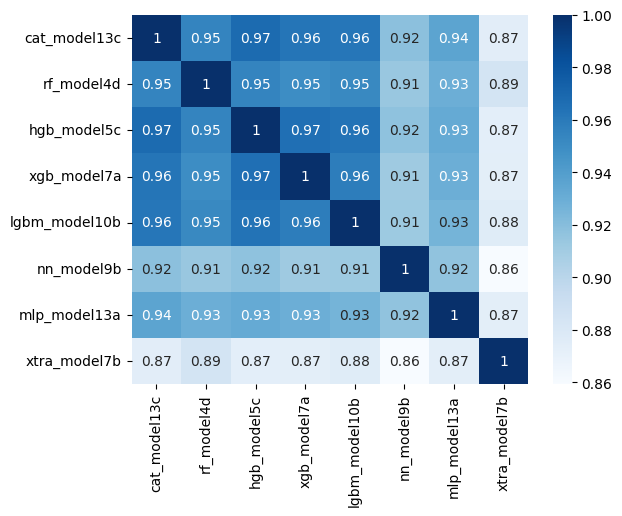

In [89]:
df = pd.DataFrame(correlation_matrix, columns=models, index=models)

# Visualize the correlation matrix as a heatmap
sns.heatmap(df, annot=True, cmap='Blues')
plt.show()

In [90]:
ensemble_scores = pd.DataFrame(columns = ['Model_name', 'Model_description', 'CV_accuracy', 'CV_std(+/-)', 'Train_accuracy', 'Test_accuracy'])

In [92]:
# create voting classifier instance
vtc_model13a = VotingClassifier(estimators = [('cat_c', cat_model13c),
                                             ('nn_b', nn_model9b)],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13a = try_model_scaled(vtc_model13a, 'vtc_model13a', 'Voting(CAT,NN)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13a, ignore_index=True)
ensemble_scores.tail(1)

In [ ]:
# predicting for test_data
predict(vtc_model13a, 'vtc_model13a')

In [93]:
# create voting classifier instance
vtc_model13b = VotingClassifier(estimators = [('cat_c', cat_model13c),
                                             ('hgb_c', hgb_model5c),
                                             ('xgb_a', xgb_model7a),
                                             ('lgbm_b', lgbm_model10b)],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13b = try_model_scaled(vtc_model13b, 'vtc_model13b', 'Voting(CAT,HGB,XGB, LGBM)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95504768 0.9509611  0.95656122 0.95126381 0.95353413 0.95746291
 0.95398123 0.95761429 0.95413261 0.955495  ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9546
Cross validated Train Std dev is: 0.0022
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9734
Test Accuracy is: 0.9565


In [94]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13b, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,vtc_model13b,"Voting(CAT,HGB,XGB, LGBM)(Hard)",0.954605,0.002196,0.97339,0.956488


In [95]:
# predicting for test_data
predict(vtc_model13b, 'vtc_model13b')

In [96]:
# create voting classifier instance
vtc_model13c = VotingClassifier(estimators = [('cat_c', cat_model13c),
                                             ('hgb_c', hgb_model5c),
                                             ('xgb_a', xgb_model7a),
                                             ('lgbm_b', lgbm_model10b)],
                                voting = 'soft',
                                n_jobs = -1)
ensemble_score_13c = try_model_scaled(vtc_model13c, 'vtc_model13c', 'Voting(CAT,HGB,XGB,LGBM)(Soft)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95474497 0.94975026 0.95640987 0.95126381 0.95202058 0.95852256
 0.95610051 0.95806842 0.95428398 0.95458674]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9546
Cross validated Train Std dev is: 0.0027
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9740
Test Accuracy is: 0.9569


In [97]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13c, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,vtc_model13c,"Voting(CAT,HGB,XGB,LGBM)(Soft)",0.954575,0.002727,0.973995,0.956947


In [98]:
# predicting for test_data
predict(vtc_model13c, 'vtc_model13c')

In [99]:
# create voting classifier instance
vtc_model13d = VotingClassifier(estimators = [('cat_c', cat_model13c),
                                             ('rf_d', rf_model4d),
                                             ('xgb_a', xgb_model7a),
                                             ('xtra_b', xtra_model7b)],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13d = try_model_scaled(vtc_model13d, 'vtc_model13d', 'Voting(CAT,RF,XGB,XTRA)(HARD)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 18.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95323142 0.95035568 0.95550174 0.94823672 0.95292871 0.95716016
 0.95231608 0.9582198  0.95292159 0.95488949]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9536
Cross validated Train Std dev is: 0.0029
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s


Train Accuracy is: 0.9745


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s


Test Accuracy is: 0.9556


In [100]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13d, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,vtc_model13d,"Voting(CAT,RF,XGB,XTRA)(HARD)",0.953576,0.002851,0.974495,0.95564


In [101]:
# predicting for test_data
predict(vtc_model13d, 'vtc_model13d')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.0s


In [104]:
# create voting classifier instance
vtc_model13f = VotingClassifier(estimators = [('rf_base', RandomForestClassifier()),
                                             ('xgb_base', XGBClassifier()),
                                             ('lgbm_base', LGBMClassifier()),
                                             ('cat_base', CatBoostClassifier()),
 #                                            ('xtra_a', xtra_model8a),
                                              ('nn_b', nn_model9b)],
                                voting = 'soft',
                                n_jobs = -1)
ensemble_score_13f = try_model_scaled(vtc_model13f, 'vtc_model13f', 'Voting(RF,XGB,LGBM,CAT,NN)(Soft)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 46.0min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95474497 0.95005297 0.95474497 0.94944756 0.95444226 0.9568574
 0.95095368 0.95761429 0.95504087 0.95428398]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9538
Cross validated Train Std dev is: 0.0026
----------------------------------------------------------------------------------------------------
1033/1033 [==============================] - 2s 2ms/step
Train Accuracy is: 0.9758
443/443 [==============================] - 2s 5ms/step
Test Accuracy is: 0.9558


In [105]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13f, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
3,vtc_model13f,"Voting(RF,XGB,LGBM,CAT,NN)(Soft)",0.953818,0.002626,0.975812,0.955817


In [ ]:
# predicting for test_data
predict(vtc_model13f, 'vtc_model13f')